In [112]:
import pandas as pd; from scipy import stats;

In [113]:
from phcalc import calc_pH

In [114]:
data_df=pd.read_csv('111521_WQX_Loss_10NOV21A.csv')
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
0           0                                0.001146   
1           1                                0.000104   
2           2                                0.000071   
3           3                                0.000060   
4           4                                0.000052   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000026   
1                                0.000003   
2                                0.000002   
3                                0.000002   
4                                0.000001   

   Runoff_All(mm/day)_Delineated_Average  Year  \
0                               3.575873  1998   
1                               0.725718  1998   
2                               0.445550  1998   
3                               0.409570  1998   
4                               0.383245  1998   

   NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
0                                0.000128     0   
1                                0.000011     1   
2                                0.000007     2   
3                                0.000006     3   
4                                0.000005     4   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.038477  0.109935            2.6375   
1                                0.003461  0.009887            3.3125   
2                                0.002371  0.006773            0.7625   
3                                0.001990  0.005685            0.0875   
4                                0.001735  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [115]:
#Check for any zero runoff days should equal 0
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, DON_Loss(gN/day/m2)_Delineated_Average, NH4_Loss(gN/day/m2)_Delineated_Average, Runoff_All(mm/day)_Delineated_Average, Year, NO3_Loss(gN/day/m2)_Delineated_Average, Step, DOC_Loss(gC/day/m2)_Delineated_Average, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [116]:
pools_di=pd.read_csv('BC10NOV21AWQDI_pHcalc.csv')

In [117]:
#VELMA Simulation focusing on Water Quality Parameters Before renaming as concentrations
pools_di.drop(columns={'Unnamed: 0','Criteria', 'Condition'})

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               4.914795                          178.441696   
1                               4.915759                          178.600606   
2                               4.916773                          178.762523   
3                               4.917767                          178.922577   
4                               4.918738                          179.075808   
...                                  ...                                 ...   
1973                            7.037189                        16521.919643   
1974                            7.037681                        16522.382812   
1975                            7.038156                        16523.085938   
1976                            7.038651                        16524.893973   
1977                            7.039123                        16525.442243   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                               0.653129                            0.017829   
1                               0.656923                            0.018524   
2                               0.652833                            0.018774   
3                               0.649692                            0.018661   
4                               0.648918                            0.018418   
...                                  ...                                 ...   
1973                            8.717395                            0.964325   
1974                            8.749933                            0.964316   
1975                            8.780787                            0.964284   
1976                            8.812504                            0.964275   
1977                            8.841816                            0.964246   

      Step  Runoff_All(mm/day)_Delineated_Average  Sfc_Water_Temp_C  \
0     1309                               0.014679         20.112500   
1     1310                               0.022896         19.737500   
2     1311                               0.028915         19.962502   
3     1312                               0.020605         19.812500   
4     1313                               0.015855         19.287498   
...    ...                                    ...               ...   
1973  3282                               0.008217         -1.562500   
1974  3283                               0.008018         -2.837500   
1975  3284                               0.007825         -0.812500   
1976  3285                               0.008044          4.512500   
1977  3286                               0.007484         -2.087500   

            Date  
0     2001-08-02  
1     2001-08-03  
2     2001-08-04  
3     2001-08-05  
4     2001-08-06  
...          ...  
1973  2006-12-27  
1974  2006-12-28  
1975  2006-12-29  
1976  2006-12-30  
1977  2006-12-31  

[1978 rows x 8 columns]

In [118]:
#Defining Percentiles list for tails and distrubition interval
perc = [0.1, 0.25, 0.5, .75, .9]

In [119]:
pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition', 'Date'}).describe(percentiles =perc)

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             5.737448                         7443.258572   
std                              0.616388                         5220.469239   
min                              4.914795                          178.441696   
10%                              5.002676                          190.056750   
25%                              5.201743                         2856.571219   
50%                              5.584929                         6966.140137   
75%                              6.249759                        12244.692732   
90%                              6.613182                        14356.374163   
max                              7.039123                        16525.442243   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             5.653199                            0.396029   
std                              3.350871                            0.359784   
min                              0.635454                            0.001144   
10%                              1.065425                            0.003425   
25%                              3.084045                            0.112746   
50%                              5.650225                            0.302114   
75%                              7.738559                            0.634329   
90%                             10.508626                            0.970460   
max                             14.106857                            1.448935   

              Step  Runoff_All(mm/day)_Delineated_Average  
count  1978.000000                            1978.000000  
mean   2297.500000                               0.093479  
std     571.143736                               0.751254  
min    1309.000000                               0.000163  
10%    1506.700000                               0.001745  
25%    1803.250000                               0.009101  
50%    2297.500000                               0.026392  
75%    2791.750000                               0.078694  
90%    3088.300000                               0.193820  
max    3286.000000                              32.761253

In [120]:
#Loss Stats 
data_df.describe(percentiles=perc).drop(columns='Year')

Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean   1643.000000                            1.691709e-05   
std     949.019494                            3.963505e-05   
min       0.000000                            1.531152e-07   
10%     328.600000                            4.551938e-07   
25%     821.500000                            1.233630e-06   
50%    1643.000000                            6.516657e-06   
75%    2464.500000                            1.809667e-05   
90%    2957.400000                            4.021341e-05   
max    3286.000000                            1.146204e-03   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             7.625075e-06   
std                              2.251210e-05   
min                              1.088774e-09   
10%                              1.042998e-08   
25%                              4.258997e-08   
50%                              1.503466e-06   
75%                              7.255509e-06   
90%                              1.976112e-05   
max                              8.575994e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.064497   
std                                 0.588327   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001197   
50%                                 0.011942   
75%                                 0.046786   
90%                                 0.141798   
max                                32.761253   

       NO3_Loss(gN/day/m2)_Delineated_Average         Step  \
count                            3.287000e+03  3287.000000   
mean                             1.036949e-06  1643.000000   
std                              6.225538e-06   949.019494   
min                              1.490474e-11     0.000000   
10%                              2.183074e-10   328.600000   
25%                              1.307638e-09   821.500000   
50%                              3.583955e-08  1643.000000   
75%                              4.484667e-07  2464.500000   
90%                              2.277790e-06  2957.400000   
max                              2.895190e-04  3286.000000   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.053309     0.152313         11.248536   
std                                  0.164313     0.469465          6.931090   
min                                  0.000010     0.000029        -10.562500   
10%                                  0.000028     0.000081          2.262500   
25%                                  0.000083     0.000236          5.787500   
50%                                  0.006499     0.018567         11.112499   
75%                                  0.065367     0.186763         17.712502   
90%                                  0.138587     0.395961         20.412498   
max                                  7.239789    20.685111         24.087502   

               CO2  Alk_140  
count  3287.000000   3287.0  
mean      0.038078    140.0  
std       0.117366      0.0  
min       0.000007    140.0  
10%       0.000020    140.0  
25%       0.000059    140.0  
50%       0.004642    140.0  
75%       0.046691    140.0  
90%       0.098990    140.0  
max       5.171278    140.0

In [121]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(1.0185015526076311e-05, 7.239789009094238), mean=0.05330943461014617, variance=0.026998682389647515, skewness=26.855658443121413, kurtosis=1118.3416395500005)

In [122]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(2.9100044360218036e-05, 20.685111454554967), mean=0.15231267031470333, variance=0.2203974072624287, skewness=26.85565844312141, kurtosis=1118.3416395500005)

In [123]:
"""these are corrected columns needed for pH calculation...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0274836351828915, 2.6374998, 0.1099345407315663, 140.0]

In [124]:
215/(12*0.35)

51.1904761904762

In [125]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.6246280723384432
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 6.012930948721311e-07
SQRT of Alpha= 0.000775430909154472
A value 3.1104568917377766
B value 0.43429448190325176
C value 0.001550861818308944

CO2 Estimate 0.056177268088975
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 5.494267667125262e-08
SQRT of Alpha= 0.00023439854238295216
A value 3.6300450933237793
B value 0.43429448190325176
C value 0.00046879708476590433

CO2 Estimate 0.038485280117138636
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 3.5408561720641985e-08
SQRT of Alpha= 0.00018817162836262533
A value 3.725445856862044
B value 0.43429448190325176
C value 0.00037634325672525066

CO2 Estimate 0.03229998665946364
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 2.922479980135228e-08
SQRT of Alpha= 0.00017095262443540398
A value 3

CO2 Estimate 0.03239913244864545
Exponent value 5.98815213725
H2CO3 value 1.0276562378720133e-06
pkw= 1e-14
Alpha value= 3.329518056249206e-08
SQRT of Alpha= 0.00018246967025369466
A value 3.738809312775246
B value 0.43429448190325176
C value 0.0003649393405073893

CO2 Estimate 0.025846401241595457
Exponent value 6.00586968125
H2CO3 value 9.865754829351352e-07
pkw= 1e-14
Alpha value= 2.5499435787062315e-08
SQRT of Alpha= 0.00015968542759770633
A value 3.7967347144354986
B value 0.43429448190325176
C value 0.00031937085519541267

CO2 Estimate 0.020992082646477273
Exponent value 5.98455102725
H2CO3 value 1.0362128478795874e-06
pkw= 1e-14
Alpha value= 2.1752275742029883e-08
SQRT of Alpha= 0.00014748652732378604
A value 3.831247650032754
B value 0.43429448190325176
C value 0.0002949730546475721

CO2 Estimate 0.03891413072849545
Exponent value 5.951560195250001
H2CO3 value 1.1179948545196777e-06
pkw= 1e-14
Alpha value= 4.3505807922563994e-08
SQRT of Alpha= 0.0002085804591100614
A value 3.68

Alpha value= 4.288993734970524e-08
SQRT of Alpha= 0.0002070988588807414
A value 3.6838222940720833
B value 0.43429448190325176
C value 0.0004141977177614828

CO2 Estimate 0.03083943171644318
Exponent value 5.90015933525
H2CO3 value 1.2584636182155496e-06
pkw= 1e-14
Alpha value= 3.8810312821586464e-08
SQRT of Alpha= 0.00019700333200630508
A value 3.705526428357623
B value 0.43429448190325176
C value 0.00039400666401261016

CO2 Estimate 0.022986683429084095
Exponent value 5.87957856725
H2CO3 value 1.319536575682413e-06
pkw= 1e-14
Alpha value= 3.03317795383093e-08
SQRT of Alpha= 0.00017416021227108474
A value 3.7590510546370086
B value 0.43429448190325176
C value 0.0003483204245421695

CO2 Estimate 0.017251885139272727
Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 2.2552281387446984e-08
SQRT of Alpha= 0.00015017417017399159
A value 3.823404759179855
B value 0.43429448190325176
C value 0.00030034834034798317

CO2 Estimate 0.013577758051852271
E


CO2 Estimate 0.0015558408130664839
Exponent value 5.89796154725
H2CO3 value 1.264848333106837e-06
pkw= 1e-14
Alpha value= 1.967912658986728e-09
SQRT of Alpha= 4.4361161605471156e-05
A value 4.352997090290207
B value 0.43429448190325176
C value 8.872232321094231e-05

CO2 Estimate 0.0014460244068237895
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 1.8969957391821595e-09
SQRT of Alpha= 4.3554514567173854e-05
A value 4.360966822286758
B value 0.43429448190325176
C value 8.710902913434771e-05

CO2 Estimate 0.001337734416169538
Exponent value 5.88519213125
H2CO3 value 1.3025903868631068e-06
pkw= 1e-14
Alpha value= 1.7425299906783708e-09
SQRT of Alpha= 4.174362215570626e-05
A value 4.379409869262311
B value 0.43429448190325176
C value 8.348724431141253e-05

CO2 Estimate 0.001245942186940667
Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 1.5559921885078995e-09
SQRT of Alpha= 3.9446066831914936e-05
A value

C value 3.1179956036234913e-05

CO2 Estimate 0.00025344437059860185
Exponent value 6.00286707725
H2CO3 value 9.934200539409684e-07
pkw= 1e-14
Alpha value= 2.517867203110978e-10
SQRT of Alpha= 1.5867788765643995e-05
A value 4.7994835895519214
B value 0.43429448190325176
C value 3.173557753128799e-05

CO2 Estimate 0.00024814101249960786
Exponent value 5.962917181250001
H2CO3 value 1.0891377690750649e-06
pkw= 1e-14
Alpha value= 2.7026974876985066e-10
SQRT of Alpha= 1.643988286971202e-05
A value 4.784101281030697
B value 0.43429448190325176
C value 3.287976573942404e-05

CO2 Estimate 0.00024799324913961856
Exponent value 5.962239187250001
H2CO3 value 1.0908393922788409e-06
pkw= 1e-14
Alpha value= 2.7053080518071664e-10
SQRT of Alpha= 1.644782068180209e-05
A value 4.783891637444568
B value 0.43429448190325176
C value 3.289564136360418e-05

CO2 Estimate 0.0002439927422009143
Exponent value 5.977441957250001
H2CO3 value 1.0533144514835342e-06
pkw= 1e-14
Alpha value= 2.570110814173194e-10
SQRT

B value 0.43429448190325176
C value 7.81778510481554e-05

CO2 Estimate 0.001347055437584565
Exponent value 5.962917181250001
H2CO3 value 1.0891377690750649e-06
pkw= 1e-14
Alpha value= 1.4671389541112885e-09
SQRT of Alpha= 3.830324991578767e-05
A value 4.416764375884793
B value 0.43429448190325176
C value 7.660649983157534e-05

CO2 Estimate 0.001248950960776805
Exponent value 5.9602126572500005
H2CO3 value 1.0959414245083994e-06
pkw= 1e-14
Alpha value= 1.368787095094866e-09
SQRT of Alpha= 3.699712279481833e-05
A value 4.431832048984905
B value 0.43429448190325176
C value 7.399424558963666e-05

CO2 Estimate 0.001119881850975723
Exponent value 5.962917181250001
H2CO3 value 1.0891377690750649e-06
pkw= 1e-14
Alpha value= 1.2197156207993532e-09
SQRT of Alpha= 3.492442727947522e-05
A value 4.456870707086451
B value 0.43429448190325176
C value 6.984885455895044e-05

CO2 Estimate 0.0010480668500455874
Exponent value 5.99840043125
H2CO3 value 1.0036899342657129e-06
pkw= 1e-14
Alpha value= 1.0519

SQRT of Alpha= 5.415143873170342e-05
A value 4.266390000258621
B value 0.43429448190325176
C value 0.00010830287746340685

CO2 Estimate 0.0019965289113740743
Exponent value 5.91492932946036
H2CO3 value 1.216383920532327e-06
pkw= 1e-14
Alpha value= 2.4285556646733354e-09
SQRT of Alpha= 4.9280378089796914e-05
A value 4.307325968828968
B value 0.43429448190325176
C value 9.856075617959383e-05

CO2 Estimate 0.0017898723440752788
Exponent value 5.912023739543161
H2CO3 value 1.2245492607342184e-06
pkw= 1e-14
Alpha value= 2.1917968557460052e-09
SQRT of Alpha= 4.6816630119499256e-05
A value 4.329599850211741
B value 0.43429448190325176
C value 9.363326023899851e-05

CO2 Estimate 0.0015847638076286182
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 2.09600607837171e-09
SQRT of Alpha= 4.578215895271552e-05
A value 4.339303731121
B value 0.43429448190325176
C value 9.156431790543104e-05

CO2 Estimate 0.0013670282955840836
Exponent value 5.87657995202224

SQRT of Alpha= 0.00011954478767441034
A value 3.9224693550027494
B value 0.43429448190325176
C value 0.00023908957534882067

CO2 Estimate 0.008694754230075
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 1.1799899579272372e-08
SQRT of Alpha= 0.00010862734268715392
A value 3.9640608443280154
B value 0.43429448190325176
C value 0.00021725468537430785

CO2 Estimate 0.007180512641622727
Exponent value 5.87023638125
H2CO3 value 1.3482288581382126e-06
pkw= 1e-14
Alpha value= 9.68098435966201e-09
SQRT of Alpha= 9.83919933717272e-05
A value 4.007040240755176
B value 0.43429448190325176
C value 0.0001967839867434544

CO2 Estimate 0.006168067864256818
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 8.370864171350283e-09
SQRT of Alpha= 9.149242685244655e-05
A value 4.038614852516167
B value 0.43429448190325176
C value 0.0001829848537048931

CO2 Estimate 0.005630078833615909
Exponent value 5.865499531250001
H2CO3 value

Exponent value 5.963596417250001
H2CO3 value 1.0874356904042933e-06
pkw= 1e-14
Alpha value= 4.0994584874214885e-09
SQRT of Alpha= 6.402701373187327e-05
A value 4.193636753525092
B value 0.43429448190325176
C value 0.00012805402746374653

CO2 Estimate 0.00821448433176591
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 8.862771824159133e-09
SQRT of Alpha= 9.414229561764008e-05
A value 4.026215215824213
B value 0.43429448190325176
C value 0.00018828459123528015

CO2 Estimate 0.009463599946518181
Exponent value 6.011172055249999
H2CO3 value 9.74603450768408e-07
pkw= 1e-14
Alpha value= 9.22326716456834e-09
SQRT of Alpha= 9.603784235689774e-05
A value 4.017557605622708
B value 0.43429448190325176
C value 0.00019207568471379548

CO2 Estimate 0.008266126622093181
Exponent value 6.011934505250001
H2CO3 value 9.72893932158218e-07
pkw= 1e-14
Alpha value= 8.042074433085963e-09
SQRT of Alpha= 8.967761389045743e-05
A value 4.047315955809981
B value 0.4342

B value 0.43429448190325176
C value 6.507371720310985e-05

CO2 Estimate 0.0010772081233361471
Exponent value 6.024302618293925
H2CO3 value 9.455780488372846e-07
pkw= 1e-14
Alpha value= 1.0185943554558673e-09
SQRT of Alpha= 3.191542503956147e-05
A value 4.49599936739877
B value 0.43429448190325176
C value 6.383085007912294e-05

CO2 Estimate 0.001031440932548593
Exponent value 6.025086181250001
H2CO3 value 9.438735557516796e-07
pkw= 1e-14
Alpha value= 9.735598205524689e-10
SQRT of Alpha= 3.1201920142075694e-05
A value 4.505818679012056
B value 0.43429448190325176
C value 6.240384028415139e-05

CO2 Estimate 0.0009892872114576606
Exponent value 6.0282328583022045
H2CO3 value 9.370594433705924e-07
pkw= 1e-14
Alpha value= 9.270309237021609e-10
SQRT of Alpha= 3.044718252486034e-05
A value 4.516452889255039
B value 0.43429448190325176
C value 6.089436504972068e-05

CO2 Estimate 0.0009488955477642672
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 9.28

SQRT of Alpha= 3.704056340024045e-05
A value 4.431322416165193
B value 0.43429448190325176
C value 7.40811268004809e-05

CO2 Estimate 0.0011124393495265394
Exponent value 5.94569298725
H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 1.2606275680947958e-09
SQRT of Alpha= 3.550531746224494e-05
A value 4.449706599858362
B value 0.43429448190325176
C value 7.101063492448988e-05

CO2 Estimate 0.00211921242343915
Exponent value 5.93613785888076
H2CO3 value 1.1584095817435244e-06
pkw= 1e-14
Alpha value= 2.4549259770618265e-09
SQRT of Alpha= 4.954720957896445e-05
A value 4.3049807992732045
B value 0.43429448190325176
C value 9.90944191579289e-05

CO2 Estimate 0.003758861755879546
Exponent value 5.931156075486761
H2CO3 value 1.1717741810762457e-06
pkw= 1e-14
Alpha value= 4.4045471557745735e-09
SQRT of Alpha= 6.636676243252019e-05
A value 4.178049368013924
B value 0.43429448190325176
C value 0.00013273352486504038

CO2 Estimate 0.0037062497315886365
Exponent value 5.919049335155561
H2

H2CO3 value 1.3271602718986335e-06
pkw= 1e-14
Alpha value= 3.7133984500975924e-09
SQRT of Alpha= 6.093766035956412e-05
A value 4.21511422409491
B value 0.43429448190325176
C value 0.00012187532071912824

CO2 Estimate 0.002474799338734091
Exponent value 5.8746057372500005
H2CO3 value 1.3347325839712387e-06
pkw= 1e-14
Alpha value= 3.303205316198866e-09
SQRT of Alpha= 5.7473518390636796e-05
A value 4.240532215588296
B value 0.43429448190325176
C value 0.00011494703678127359

CO2 Estimate 0.0022982427938795453
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 3.0917092381947414e-09
SQRT of Alpha= 5.5603140542551565e-05
A value 4.254900678170072
B value 0.43429448190325176
C value 0.00011120628108510313

CO2 Estimate 0.0019492940087470093
Exponent value 5.867852431250001
H2CO3 value 1.3556499698666181e-06
pkw= 1e-14
Alpha value= 2.6425703642190623e-09
SQRT of Alpha= 5.140593705224195e-05
A value 4.288986719912782
B value 0.43429448190325176
C value 

CO2 Estimate 0.00047716202498595053
Exponent value 5.92504060532116
H2CO3 value 1.1883911109926215e-06
pkw= 1e-14
Alpha value= 5.670651089965428e-10
SQRT of Alpha= 2.3813128920755938e-05
A value 4.623183536819383
B value 0.43429448190325176
C value 4.7626257841511875e-05

CO2 Estimate 0.0004470508110308082
Exponent value 5.937395745652361
H2CO3 value 1.1550592285846932e-06
pkw= 1e-14
Alpha value= 5.163801649274068e-10
SQRT of Alpha= 2.2723999756367864e-05
A value 4.643515224051005
B value 0.43429448190325176
C value 4.544799951273573e-05

CO2 Estimate 0.00042402113543282106
Exponent value 5.949593281250001
H2CO3 value 1.1230697218496224e-06
pkw= 1e-14
Alpha value= 4.762152986288994e-10
SQRT of Alpha= 2.18223577697026e-05
A value 4.6610983284015335
B value 0.43429448190325176
C value 4.36447155394052e-05

CO2 Estimate 0.0004063051826299422
Exponent value 5.94569298725
H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 4.6043550674718836e-10
SQRT of Alpha= 2.1457760991007156e-05


pkw= 1e-14
Alpha value= 3.466898509652245e-10
SQRT of Alpha= 1.861960931290516e-05
A value 4.730029435869688
B value 0.43429448190325176
C value 3.723921862581032e-05

CO2 Estimate 0.00037409368555277724
Exponent value 6.049992696153084
H2CO3 value 8.912659270765605e-07
pkw= 1e-14
Alpha value= 3.3342695546768325e-10
SQRT of Alpha= 1.825998235124238e-05
A value 4.738499646558661
B value 0.43429448190325176
C value 3.651996470248476e-05

CO2 Estimate 0.0003687134338108152
Exponent value 6.0516405567903195
H2CO3 value 8.878905693840981e-07
pkw= 1e-14
Alpha value= 3.2738718068585065e-10
SQRT of Alpha= 1.809384372337317e-05
A value 4.742469165006929
B value 0.43429448190325176
C value 3.618768744674634e-05

CO2 Estimate 0.00036401739965764466
Exponent value 6.01885244525
H2CO3 value 9.575193402860725e-07
pkw= 1e-14
Alpha value= 3.485637003728395e-10
SQRT of Alpha= 1.8669860748619404e-05
A value 4.7288589212759735
B value 0.43429448190325176
C value 3.733972149723881e-05

CO2 Estimate 0.0003

pkw= 1e-14
Alpha value= 3.419295603456122e-09
SQRT of Alpha= 5.847474329534181e-05
A value 4.233031676071374
B value 0.43429448190325176
C value 0.00011694948659068362

CO2 Estimate 0.002699741710418182
Exponent value 5.9323940652500005
H2CO3 value 1.1684387050849733e-06
pkw= 1e-14
Alpha value= 3.1544927081849116e-09
SQRT of Alpha= 5.616487076620858e-05
A value 4.250535236078391
B value 0.43429448190325176
C value 0.00011232974153241716

CO2 Estimate 0.002320305954184091
Exponent value 5.909721631250001
H2CO3 value 1.2310575861743383e-06
pkw= 1e-14
Alpha value= 2.8564402471438117e-09
SQRT of Alpha= 5.3445675663647584e-05
A value 4.272087428180001
B value 0.43429448190325176
C value 0.00010689135132729517

CO2 Estimate 0.001997675347163088
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 2.468985752891086e-09
SQRT of Alpha= 4.968888963230197e-05
A value 4.303740708063324
B value 0.43429448190325176
C value 9.937777926460394e-05

CO2 Estimate 0.0016

CO2 Estimate 0.002941220349406818
Exponent value 5.868326737250001
H2CO3 value 1.3541702321465438e-06
pkw= 1e-14
Alpha value= 3.98292304335037e-09
SQRT of Alpha= 6.311040360630227e-05
A value 4.199899042398043
B value 0.43429448190325176
C value 0.00012622080721260453

CO2 Estimate 0.002444030542390909
Exponent value 5.86503267725
H2CO3 value 1.3644804662842214e-06
pkw= 1e-14
Alpha value= 3.334841934094426e-09
SQRT of Alpha= 5.7748090306904746e-05
A value 4.238462373044244
B value 0.43429448190325176
C value 0.00011549618061380949

CO2 Estimate 0.002039324062462146
Exponent value 5.859979243181441
H2CO3 value 1.3804502407357566e-06
pkw= 1e-14
Alpha value= 2.8151953929640904e-09
SQRT of Alpha= 5.3058414911907145e-05
A value 4.275245728445183
B value 0.43429448190325176
C value 0.00010611682982381429

CO2 Estimate 0.001711891913996683
Exponent value 5.8590765972500005
H2CO3 value 1.3833223785548223e-06
pkw= 1e-14
Alpha value= 2.3681083942986584e-09
SQRT of Alpha= 4.866321397419881e-05
A 

B value 0.43429448190325176
C value 9.015948940733387e-05

CO2 Estimate 0.0016326702008244592
Exponent value 5.93488496525
H2CO3 value 1.1617562959610821e-06
pkw= 1e-14
Alpha value= 1.8967748850358595e-09
SQRT of Alpha= 4.3551979117324385e-05
A value 4.360992104715943
B value 0.43429448190325176
C value 8.710395823464877e-05

CO2 Estimate 0.0015061300768752814
Exponent value 5.94763754525
H2CO3 value 1.1281385885740093e-06
pkw= 1e-14
Alpha value= 1.699133459134944e-09
SQRT of Alpha= 4.1220546565213615e-05
A value 4.384886253976443
B value 0.43429448190325176
C value 8.244109313042723e-05

CO2 Estimate 0.0014095057141075107
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 1.5495364487638753e-09
SQRT of Alpha= 3.936415182324999e-05
A value 4.4048991018353405
B value 0.43429448190325176
C value 7.872830364649998e-05

CO2 Estimate 0.0013795642035955855
Exponent value 5.968385845250001
H2CO3 value 1.0755092619547499e-06
pkw= 1e-14
Alpha value= 1.48

CO2 Estimate 0.0006182729036966037
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 6.184475747278029e-10
SQRT of Alpha= 2.4868606207984455e-05
A value 4.60434855462326
B value 0.43429448190325176
C value 4.973721241596891e-05

CO2 Estimate 0.000604470908190517
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 6.356747500115867e-10
SQRT of Alpha= 2.5212591100709715e-05
A value 4.598382519539156
B value 0.43429448190325176
C value 5.042518220141943e-05

CO2 Estimate 0.0005995520773644608
Exponent value 5.99914176725
H2CO3 value 1.0019781078155023e-06
pkw= 1e-14
Alpha value= 6.007480560144961e-10
SQRT of Alpha= 2.4510162300859947e-05
A value 4.61065381293664
B value 0.43429448190325176
C value 4.9020324601719894e-05

CO2 Estimate 0.000585770279727725
Exponent value 5.98598774525
H2CO3 value 1.0327905482256251e-06
pkw= 1e-14
Alpha value= 6.049880083342749e-10
SQRT of Alpha= 2.4596503986019537e-05
A value

Exponent value 6.034585823758367
H2CO3 value 9.234516810917251e-07
pkw= 1e-14
Alpha value= 1.6022763723902206e-09
SQRT of Alpha= 4.002844454122869e-05
A value 4.3976312857451605
B value 0.43429448190325176
C value 8.005688908245738e-05

CO2 Estimate 0.001906425153153235
Exponent value 5.963596417250001
H2CO3 value 1.0874356904042933e-06
pkw= 1e-14
Alpha value= 2.0731247526232985e-09
SQRT of Alpha= 4.5531579729055067e-05
A value 4.341687281479428
B value 0.43429448190325176
C value 9.106315945811013e-05

CO2 Estimate 0.0024259871124386366
Exponent value 5.961562435250001
H2CO3 value 1.0925405495637868e-06
pkw= 1e-14
Alpha value= 2.650499293058372e-09
SQRT of Alpha= 5.148300003941468e-05
A value 4.288336153636319
B value 0.43429448190325176
C value 0.00010296600007882936

CO2 Estimate 0.002348430128918182
Exponent value 5.95552755725
H2CO3 value 1.1078282682132512e-06
pkw= 1e-14
Alpha value= 2.6016672827392517e-09
SQRT of Alpha= 5.10065415681092e-05
A value 4.292374122240325
B value 0.43

CO2 Estimate 0.044879089291025
Exponent value 5.89042578125
H2CO3 value 1.2869871738942782e-06
pkw= 1e-14
Alpha value= 5.7758822293605235e-08
SQRT of Alpha= 0.0002403306520059504
A value 3.6191908353213806
B value 0.43429448190325176
C value 0.0004806613040119008

CO2 Estimate 0.04529980216900909
Exponent value 5.873138107250001
H2CO3 value 1.3392507330202396e-06
pkw= 1e-14
Alpha value= 6.066780326051726e-08
SQRT of Alpha= 0.0002463083499610138
A value 3.6085208651380607
B value 0.43429448190325176
C value 0.0004926166999220276

CO2 Estimate 0.052166847185556815
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 7.025508354592204e-08
SQRT of Alpha= 0.00026505675532972564
A value 3.576661122714532
B value 0.43429448190325176
C value 0.0005301135106594513

CO2 Estimate 0.05961730305177727
Exponent value 5.86880229794784
H2CO3 value 1.3526882016226398e-06
pkw= 1e-14
Alpha value= 8.06436324507005e-08
SQRT of Alpha= 0.0002839782253108511
A value 3.546714

C value 0.0014588041948302014

CO2 Estimate 0.45597477658808866
Exponent value 5.897415205250001
H2CO3 value 1.266440512245175e-06
pkw= 1e-14
Alpha value= 5.774649396330983e-07
SQRT of Alpha= 0.0007599111393005752
A value 3.1192371892556605
B value 0.43429448190325176
C value 0.0015198222786011505

CO2 Estimate 0.8108993000411364
Exponent value 5.913182264989961
H2CO3 value 1.221287002074584e-06
pkw= 1e-14
Alpha value= 9.90340785131618e-07
SQRT of Alpha= 0.0009951586733439135
A value 3.0021076675320315
B value 0.43429448190325176
C value 0.001990317346687827

CO2 Estimate 1.1627561134564388
Exponent value 5.931156075486761
H2CO3 value 1.1717741810762457e-06
pkw= 1e-14
Alpha value= 1.3624876026368167e-06
SQRT of Alpha= 0.001167256442533866
A value 2.9328337203535186
B value 0.43429448190325176
C value 0.002334512885067732

CO2 Estimate 1.0134495020686793
Exponent value 5.93426038556956
H2CO3 value 1.1634282752823488e-06
pkw= 1e-14
Alpha value= 1.179075816277519e-06
SQRT of Alpha= 0.0010

CO2 Estimate 0.1471882305023341
Exponent value 5.99914176725
H2CO3 value 1.0019781078155023e-06
pkw= 1e-14
Alpha value= 1.4747939469144074e-07
SQRT of Alpha= 0.0003840304606296755
A value 3.4156343267816265
B value 0.43429448190325176
C value 0.000768060921259351

CO2 Estimate 0.1447423143530023
Exponent value 5.986707967250001
H2CO3 value 1.0310792162483818e-06
pkw= 1e-14
Alpha value= 1.4924080204107054e-07
SQRT of Alpha= 0.0003863169709462303
A value 3.4130562128326396
B value 0.43429448190325176
C value 0.0007726339418924606

CO2 Estimate 0.14233182172302727
Exponent value 6.010410845221768
H2CO3 value 9.76313185740464e-07
pkw= 1e-14
Alpha value= 1.3896044429865256e-07
SQRT of Alpha= 0.00037277398554439465
A value 3.428554402993832
B value 0.43429448190325176
C value 0.0007455479710887893

CO2 Estimate 0.13936991355829317
Exponent value 6.04507893125
H2CO3 value 9.014072956197059e-07
pkw= 1e-14
Alpha value= 1.2562906687133323e-07
SQRT of Alpha= 0.0003544419090222448
A value 3.450454

H2CO3 value 1.0242329065886932e-06
pkw= 1e-14
Alpha value= 1.0932554892099282e-06
SQRT of Alpha= 0.0010455885850610307
A value 2.9806391666976597
B value 0.43429448190325176
C value 0.0020911771701220615

CO2 Estimate 1.292733790038466
Exponent value 5.977441957250001
H2CO3 value 1.0533144514835342e-06
pkw= 1e-14
Alpha value= 1.3616551929685971e-06
SQRT of Alpha= 0.0011668998213079807
A value 2.932966426662977
B value 0.43429448190325176
C value 0.0023337996426159614

CO2 Estimate 1.0922553574109999
Exponent value 5.9411991552500005
H2CO3 value 1.1449877618137441e-06
pkw= 1e-14
Alpha value= 1.250619027011092e-06
SQRT of Alpha= 0.0011183107917797682
A value 2.9514374841082343
B value 0.43429448190325176
C value 0.0022366215835595365

CO2 Estimate 0.9316868789784317
Exponent value 5.92383239921196
H2CO3 value 1.1917018149950869e-06
pkw= 1e-14
Alpha value= 1.110292954685705e-06
SQRT of Alpha= 0.0010537043962543314
A value 2.977281207986348
B value 0.43429448190325176
C value 0.00210740879

SQRT of Alpha= 0.0015160721486861552
A value 2.819280130477918
B value 0.43429448190325176
C value 0.0030321442973723104

CO2 Estimate 1.7271166691532365
Exponent value 5.8775745312500005
H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 2.2895342590704165e-06
SQRT of Alpha= 0.0015131207020824269
A value 2.8201264267967026
B value 0.43429448190325176
C value 0.0030262414041648538

CO2 Estimate 1.4361321877736524
Exponent value 5.875097431250001
H2CO3 value 1.3332222985283698e-06
pkw= 1e-14
Alpha value= 1.914683466374165e-06
SQRT of Alpha= 0.001383720877335514
A value 2.858951506453297
B value 0.43429448190325176
C value 0.002767441754671028

CO2 Estimate 1.2696608175317932
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 1.7230915492849023e-06
SQRT of Alpha= 0.001312665817824515
A value 2.8818458237562488
B value 0.43429448190325176
C value 0.00262533163564903

CO2 Estimate 1.1548260831600636
Exponent value 5.87071689725
H2CO3 value 1.346

SQRT of Alpha= 0.0006225753297388052
A value 3.205808092729285
B value 0.43429448190325176
C value 0.0012451506594776103

CO2 Estimate 0.41798035336005
Exponent value 5.892020095250001
H2CO3 value 1.2822712492807374e-06
pkw= 1e-14
Alpha value= 5.359641998777955e-07
SQRT of Alpha= 0.0007320957586803761
A value 3.1354321091785926
B value 0.43429448190325176
C value 0.0014641915173607522

CO2 Estimate 0.7357722293440386
Exponent value 5.889369101194241
H2CO3 value 1.290122349454732e-06
pkw= 1e-14
Alpha value= 9.49236207184877e-07
SQRT of Alpha= 0.0009742875382477582
A value 3.011312852315055
B value 0.43429448190325176
C value 0.0019485750764955164

CO2 Estimate 0.7393720329968932
Exponent value 5.884160291525442
H2CO3 value 1.305688889164971e-06
pkw= 1e-14
Alpha value= 9.653898584433599e-07
SQRT of Alpha= 0.0009825425479048527
A value 3.007648633909078
B value 0.43429448190325176
C value 0.0019650850958097053

CO2 Estimate 0.7429892535914068
Exponent value 5.89042578125
H2CO3 value 1.286

B value 0.43429448190325176
C value 0.002344708369726962

CO2 Estimate 1.2314517970208978
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 1.2191342296700953e-06
SQRT of Alpha= 0.0011041441163498972
A value 2.956974237430477
B value 0.43429448190325176
C value 0.0022082882326997944

CO2 Estimate 1.1308727084429204
Exponent value 5.98815213725
H2CO3 value 1.0276562378720133e-06
pkw= 1e-14
Alpha value= 1.1621484030705858e-06
SQRT of Alpha= 0.0010780298711402137
A value 2.9673692051125187
B value 0.43429448190325176
C value 0.0021560597422804273

CO2 Estimate 1.0461256198294726
Exponent value 6.021180781250001
H2CO3 value 9.523996316167127e-07
pkw= 1e-14
Alpha value= 9.96329664950395e-07
SQRT of Alpha= 0.0009981631454578932
A value 3.0007984693524357
B value 0.43429448190325176
C value 0.0019963262909157863

CO2 Estimate 0.9769591345608977
Exponent value 6.0532933812500005
H2CO3 value 8.845178849130428e-07
pkw= 1e-14
Alpha value= 8.64137837348282e-07



CO2 Estimate 0.5462277656445228
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 5.575943940515666e-07
SQRT of Alpha= 0.0007467224344102476
A value 3.126840800601283
B value 0.43429448190325176
C value 0.0014934448688204952

CO2 Estimate 0.804134813899341
Exponent value 5.94183740525
H2CO3 value 1.1433062951133538e-06
pkw= 1e-14
Alpha value= 9.193724048509219e-07
SQRT of Alpha= 0.0009588390922625766
A value 3.018254267913491
B value 0.43429448190325176
C value 0.001917678184525153

CO2 Estimate 1.369087968940857
Exponent value 5.944402825250001
H2CO3 value 1.1365725808912298e-06
pkw= 1e-14
Alpha value= 1.5560678563262418e-06
SQRT of Alpha= 0.0012474244892282025
A value 2.903985734204819
B value 0.43429448190325176
C value 0.002494848978456405

CO2 Estimate 1.2334252332712137
Exponent value 6.002119531250001
H2CO3 value 9.951314887466618e-07
pkw= 1e-14
Alpha value= 1.2274202986428815e-06
SQRT of Alpha= 0.0011078900210051905
A value 2.9555033493920

pkw= 1e-14
Alpha value= 3.0329860332365785e-06
SQRT of Alpha= 0.001741547022976003
A value 2.7590647947955826
B value 0.43429448190325176
C value 0.003483094045952006

CO2 Estimate 2.52359534625883
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14
Alpha value= 3.4098922560946005e-06
SQRT of Alpha= 0.0018465893577334948
A value 2.7336296716947817
B value 0.43429448190325176
C value 0.0036931787154669896

CO2 Estimate 2.955804494294252
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 4.0201173297847535e-06
SQRT of Alpha= 0.0020050230247517743
A value 2.6978806357793457
B value 0.43429448190325176
C value 0.004010046049503549

CO2 Estimate 3.117927676671511
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 4.194376099585965e-06
SQRT of Alpha= 0.0020480176023623346
A value 2.688666314993092
B value 0.43429448190325176
C value 0.004096035204724669

CO2 Estimate 3.4711577675559298

CO2 Estimate 1.0847001542131591
Exponent value 5.916687595250001
H2CO3 value 1.2114692767064332e-06
pkw= 1e-14
Alpha value= 1.3140809212679724e-06
SQRT of Alpha= 0.0011463336867020757
A value 2.9406889450220413
B value 0.43429448190325176
C value 0.0022926673734041513

CO2 Estimate 1.013116886863459
Exponent value 5.90914919962596
H2CO3 value 1.2326812791919788e-06
pkw= 1e-14
Alpha value= 1.248850230069844e-06
SQRT of Alpha= 0.0011175196777103496
A value 2.951744820906736
B value 0.43429448190325176
C value 0.0022350393554206992

CO2 Estimate 0.942052438758409
Exponent value 5.88989682725
H2CO3 value 1.288555629811343e-06
pkw= 1e-14
Alpha value= 1.2138869835396534e-06
SQRT of Alpha= 0.0011017653940561273
A value 2.9579108727382395
B value 0.43429448190325176
C value 0.0022035307881122547

CO2 Estimate 0.8732668281375568
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 1.1549758103921795e-06
SQRT of Alpha= 0.0010746980089272426
A value 2.968713

A value 3.3282384931692275
B value 0.43429448190325176
C value 0.0009392722734222947

CO2 Estimate 0.2843403414665864
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 2.844160827770819e-07
SQRT of Alpha= 0.0005333067436073558
A value 3.2730229246746214
B value 0.43429448190325176
C value 0.0010666134872147116

CO2 Estimate 0.3024620040283568
Exponent value 5.976035047250001
H2CO3 value 1.0567322282475348e-06
pkw= 1e-14
Alpha value= 3.196213574771003e-07
SQRT of Alpha= 0.000565350650019172
A value 3.247682104158767
B value 0.43429448190325176
C value 0.001130701300038344

CO2 Estimate 0.30415193117284095
Exponent value 5.99251445525
H2CO3 value 1.017385502507105e-06
pkw= 1e-14
Alpha value= 3.094397753347872e-07
SQRT of Alpha= 0.0005562731121803275
A value 3.2547119314557618
B value 0.43429448190325176
C value 0.001112546224360655

CO2 Estimate 0.30862113049664774
Exponent value 6.005117167250001
H2CO3 value 9.882864312992452e-07
pkw= 1e-14
Alph

A value 3.3422137248552586
B value 0.43429448190325176
C value 0.0009095284133276984

CO2 Estimate 0.2087811431424159
Exponent value 6.015765385250001
H2CO3 value 9.643498444159993e-07
pkw= 1e-14
Alpha value= 2.0133807290638324e-07
SQRT of Alpha= 0.000448707112609532
A value 3.348037046262358
B value 0.43429448190325176
C value 0.000897414225219064

CO2 Estimate 0.2055999962008227
Exponent value 5.97323613125
H2CO3 value 1.0635645878444538e-06
pkw= 1e-14
Alpha value= 2.1866888522014925e-07
SQRT of Alpha= 0.0004676204499593118
A value 3.3301065045455203
B value 0.43429448190325176
C value 0.0009352408999186236

CO2 Estimate 0.2017455756083682
Exponent value 5.954200135250001
H2CO3 value 1.1112195277075445e-06
pkw= 1e-14
Alpha value= 2.2418363324461762e-07
SQRT of Alpha= 0.0004734803409272846
A value 3.3246980483482345
B value 0.43429448190325176
C value 0.0009469606818545692

CO2 Estimate 0.19761432845193636
Exponent value 5.950903315250001
H2CO3 value 1.1196871259165454e-06
pkw= 1e-14


C value 0.004422055318840962

CO2 Estimate 3.6662071943283068
Exponent value 5.937395745652361
H2CO3 value 1.1550592285846932e-06
pkw= 1e-14
Alpha value= 4.234686463712506e-06
SQRT of Alpha= 0.002057835383045132
A value 2.6865893696584098
B value 0.43429448190325176
C value 0.004115670766090264

CO2 Estimate 3.2983679179247325
Exponent value 5.92747188125
H2CO3 value 1.1817568238760648e-06
pkw= 1e-14
Alpha value= 3.897868804661441e-06
SQRT of Alpha= 0.0019743021057227897
A value 2.7045863912765222
B value 0.43429448190325176
C value 0.0039486042114455795

CO2 Estimate 2.803011228898902
Exponent value 5.91964286525
H2CO3 value 1.203253503135095e-06
pkw= 1e-14
Alpha value= 3.3727330904996113e-06
SQRT of Alpha= 0.0018365002288318972
A value 2.7360090132046526
B value 0.43429448190325176
C value 0.0036730004576637945

CO2 Estimate 2.5409169785388093
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 3.140381363271734e-06
SQRT of Alpha= 0.001772112119272

Alpha value= 1.7886241407472855e-06
SQRT of Alpha= 0.001337394534438991
A value 2.873740455973741
B value 0.43429448190325176
C value 0.002674789068877982

CO2 Estimate 1.422245442480234
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 1.9111417969672343e-06
SQRT of Alpha= 0.001382440522036024
A value 2.859353544657778
B value 0.43429448190325176
C value 0.002764881044072048

CO2 Estimate 1.6583340218314864
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 2.2234155125924353e-06
SQRT of Alpha= 0.0014911121730414635
A value 2.8264896843132847
B value 0.43429448190325176
C value 0.002982224346082927

CO2 Estimate 1.615630704667659
Exponent value 5.880588037250001
H2CO3 value 1.3164730191343728e-06
pkw= 1e-14
Alpha value= 2.126934241580027e-06
SQRT of Alpha= 0.0014584012621977626
A value 2.836122968485495
B value 0.43429448190325176
C value 0.0029168025243955253

CO2 Estimate 1.511548996552243
Exponent val

H2CO3 value 1.1634282752823488e-06
pkw= 1e-14
Alpha value= 1.3732656689312278e-06
SQRT of Alpha= 0.0011718641853607557
A value 2.9311227184938997
B value 0.43429448190325176
C value 0.0023437283707215114

CO2 Estimate 1.108928087663341
Exponent value 5.95221831725
H2CO3 value 1.1163019483691394e-06
pkw= 1e-14
Alpha value= 1.2378985948598513e-06
SQRT of Alpha= 0.0011126089137068116
A value 2.9536574650152025
B value 0.43429448190325176
C value 0.002225217827413623

CO2 Estimate 1.046033818032834
Exponent value 5.93177444525
H2CO3 value 1.1701069388139957e-06
pkw= 1e-14
Alpha value= 1.2239714387143156e-06
SQRT of Alpha= 0.0011063324268565553
A value 2.9561143581513933
B value 0.43429448190325176
C value 0.0022126648537131107

CO2 Estimate 0.9855976352443909
Exponent value 5.924435881250001
H2CO3 value 1.1900470133965508e-06
pkw= 1e-14
Alpha value= 1.1729075322332905e-06
SQRT of Alpha= 0.0010830085559372514
A value 2.9653681123666846
B value 0.43429448190325176
C value 0.00216601711187450

CO2 Estimate 1.2537891456446069
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06
pkw= 1e-14
Alpha value= 1.2627082672808365e-06
SQRT of Alpha= 0.0011237029266139857
A value 2.949348488041799
B value 0.43429448190325176
C value 0.0022474058532279714

CO2 Estimate 1.182841596665318
Exponent value 5.980980967250001
H2CO3 value 1.04476600459291e-06
pkw= 1e-14
Alpha value= 1.2357926990143227e-06
SQRT of Alpha= 0.0011116621334804576
A value 2.9540271874491966
B value 0.43429448190325176
C value 0.0022233242669609152

CO2 Estimate 1.118235023958341
Exponent value 5.991784297250001
H2CO3 value 1.0190974215050868e-06
pkw= 1e-14
Alpha value= 1.1395904395526242e-06
SQRT of Alpha= 0.0010675160137218664
A value 2.971625601437479
B value 0.43429448190325176
C value 0.002135032027443733

CO2 Estimate 1.060980214894591
Exponent value 5.987429431250001
H2CO3 value 1.029367776143803e-06
pkw= 1e-14
Alpha value= 1.0921388543386194e-06
SQRT of Alpha= 0.0010450544743402707
A value 2.9808

C value 0.002564644069161392

CO2 Estimate 1.2076471920137273
Exponent value 5.89632624725
H2CO3 value 1.2696199930397477e-06
pkw= 1e-14
Alpha value= 1.5332530295189394e-06
SQRT of Alpha= 0.0012382459487189689
A value 2.9071930842636364
B value 0.43429448190325176
C value 0.0024764918974379377

CO2 Estimate 1.2615615768092001
Exponent value 5.899608025250001
H2CO3 value 1.2600621744097073e-06
pkw= 1e-14
Alpha value= 1.5896460336259398e-06
SQRT of Alpha= 0.0012608116566822896
A value 2.899349784618643
B value 0.43429448190325176
C value 0.0025216233133645793

CO2 Estimate 1.2091663363692047
Exponent value 5.88884265927264
H2CO3 value 1.2916871547271863e-06
pkw= 1e-14
Alpha value= 1.561864634616634e-06
SQRT of Alpha= 0.0012497458280052924
A value 2.9031783043671737
B value 0.43429448190325176
C value 0.0024994916560105848

CO2 Estimate 1.1550568576369955
Exponent value 5.87707662725
H2CO3 value 1.3271602718986335e-06
pkw= 1e-14
Alpha value= 1.5329455832398963e-06
SQRT of Alpha= 0.0012381


CO2 Estimate 3.5954440955991864
Exponent value 5.868326737250001
H2CO3 value 1.3541702321465438e-06
pkw= 1e-14
Alpha value= 4.86884337560747e-06
SQRT of Alpha= 0.0022065455752391496
A value 2.6562870979605164
B value 0.43429448190325176
C value 0.004413091150478299

CO2 Estimate 3.2379611262253336
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 4.351009075012859e-06
SQRT of Alpha= 0.0020859072546527226
A value 2.6807050054435173
B value 0.43429448190325176
C value 0.004171814509305445

CO2 Estimate 2.8693211543095565
Exponent value 5.886228939107041
H2CO3 value 1.2994843719519987e-06
pkw= 1e-14
Alpha value= 3.728638008136538e-06
SQRT of Alpha= 0.0019309681530611886
A value 2.7142248888637153
B value 0.43429448190325176
C value 0.0038619363061223773

CO2 Estimate 2.582527503564759
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 3.411687739760703e-06
SQRT of Alpha= 0.0018470754558925586
A value 2.7335

CO2 Estimate 0.8124354984853158
Exponent value 5.98960127525
H2CO3 value 1.0242329065886932e-06
pkw= 1e-14
Alpha value= 8.321231820294489e-07
SQRT of Alpha= 0.0009122078611969143
A value 3.0399061894292942
B value 0.43429448190325176
C value 0.0018244157223938286

CO2 Estimate 0.7850500186542386
Exponent value 5.978853835250001
H2CO3 value 1.0498957187145257e-06
pkw= 1e-14
Alpha value= 8.242206635618437e-07
SQRT of Alpha= 0.0009078659942755008
A value 3.0419782508639823
B value 0.43429448190325176
C value 0.0018157319885510016

CO2 Estimate 0.7604792496407159
Exponent value 5.98455102725
H2CO3 value 1.0362128478795874e-06
pkw= 1e-14
Alpha value= 7.88018379023538e-07
SQRT of Alpha= 0.0008877039929072855
A value 3.051731826651527
B value 0.43429448190325176
C value 0.001775407985814571

CO2 Estimate 0.7397917329103909
Exponent value 6.024302618293925
H2CO3 value 9.455780488372846e-07
pkw= 1e-14
Alpha value= 6.995308333513611e-07
SQRT of Alpha= 0.0008363795988373707
A value 3.077596569135

In [126]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [127]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [128]:
data_2.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
0  8.366171           0                                0.001146   
1  9.406140           1                                0.000104   
2  9.596966           2                                0.000071   
3  9.680332           3                                0.000060   
4  9.708214           4                                0.000052   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000026   
1                                0.000003   
2                                0.000002   
3                                0.000002   
4                                0.000001   

   Runoff_All(mm/day)_Delineated_Average  Year  \
0                               3.575873  1998   
1                               0.725718  1998   
2                               0.445550  1998   
3                               0.409570  1998   
4                               0.383245  1998   

   NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
0                                0.000128     0   
1                                0.000011     1   
2                                0.000007     2   
3                                0.000006     3   
4                                0.000005     4   

   DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.038477  0.109935            2.6375   
1                                0.003461  0.009887            3.3125   
2                                0.002371  0.006773            0.7625   
3                                0.001990  0.005685            0.0875   
4                                0.001735  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [129]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [130]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [131]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
1309  9.967191        1309                                0.000009   
1310  9.830804        1310                                0.000012   
1311  9.706021        1311                                0.000016   
1312  9.828629        1312                                0.000012   
1313  9.933153        1313                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.971300e-08   
1310                            1.433506e-07   
1311                            1.811217e-07   
1312                            1.315092e-07   
1313                            1.030502e-07   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014679  2001   
1310                               0.022896  2001   
1311                               0.028915  2001   
1312                               0.020605  2001   
1313                               0.015855  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                            9.611801e-08  1309   
1310                            1.380132e-07  1310   
1311                            1.859344e-07  1311   
1312                            1.394759e-07  1312   
1313                            1.088426e-07  1313   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000691  0.001973         20.112500   
1310                                0.000951  0.002716         19.737500   
1311                                0.001263  0.003608         19.962502   
1312                                0.000954  0.002727         19.812500   
1313                                0.000756  0.002161         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000493      140   Prefire    Meets  
1310  0.000679      140   Prefire    Meets  
1311  0.000902      140   Prefire    Meets  
1312  0.000682      140   Prefire    Meets  
1313  0.000540      140   Prefire    Meets

In [132]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [133]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

1654    7.786178
1657    7.782401
1658    7.719077
1669    7.900587
1670    7.765730
          ...   
3249    7.937090
3250    7.984602
3251    7.985233
3252    7.973286
3253    7.990520
Name: pH_1T, Length: 738, dtype: float64

In [134]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(5.738487440705774, 11.565956068237515), mean=8.514018770672518, variance=1.2086706807507843, skewness=1.4335559571056633, kurtosis=1.195063366842552)

In [135]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(5.738487440705774, 11.979944251876741), mean=9.467851442383893, variance=2.2641529038792054, skewness=0.10967384093547061, kurtosis=-1.5664201090677399)

In [136]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'DON_Loss(gN/day/m2)_Delineated_Average',
       'NH4_Loss(gN/day/m2)_Delineated_Average',
       'Runoff_All(mm/day)_Delineated_Average', 'Year',
       'NO3_Loss(gN/day/m2)_Delineated_Average', 'Step',
       'DOC_Loss(gC/day/m2)_Delineated_Average', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [137]:
import seaborn as sns;

In [138]:
#upper bounds of the pH calculation
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [139]:
#lower bounds of the pH calculation
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [140]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [141]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(5.738487440705774, 8.5), mean=8.263093323058976, variance=0.13038197848781286, skewness=-1.5503037872872272, kurtosis=2.10015529807149)

In [142]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
1309    8.5        1309                                0.000009   
1310    8.5        1310                                0.000012   
1311    8.5        1311                                0.000016   
1312    8.5        1312                                0.000012   
1313    8.5        1313                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.971300e-08   
1310                            1.433506e-07   
1311                            1.811217e-07   
1312                            1.315092e-07   
1313                            1.030502e-07   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014679  2001   
1310                               0.022896  2001   
1311                               0.028915  2001   
1312                               0.020605  2001   
1313                               0.015855  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                            9.611801e-08  1309   
1310                            1.380132e-07  1310   
1311                            1.859344e-07  1311   
1312                            1.394759e-07  1312   
1313                            1.088426e-07  1313   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000691  0.001973         20.112500   
1310                                0.000951  0.002716         19.737500   
1311                                0.001263  0.003608         19.962502   
1312                                0.000954  0.002727         19.812500   
1313                                0.000756  0.002161         19.287498   

           CO2  Alk_140 Condition Criteria  
1309  0.000493      140   Prefire    Meets  
1310  0.000679      140   Prefire    Meets  
1311  0.000902      140   Prefire    Meets  
1312  0.000682      140   Prefire    Meets  
1313  0.000540      140   Prefire    Meets

In [143]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(5.738487440705774, 8.5), mean=8.106380981582264, variance=0.1550005711319843, skewness=-0.874780685616939, kurtosis=0.5430619288216936)

In [144]:
sns.set(palette='deep')
import matplotlib.pyplot as plt

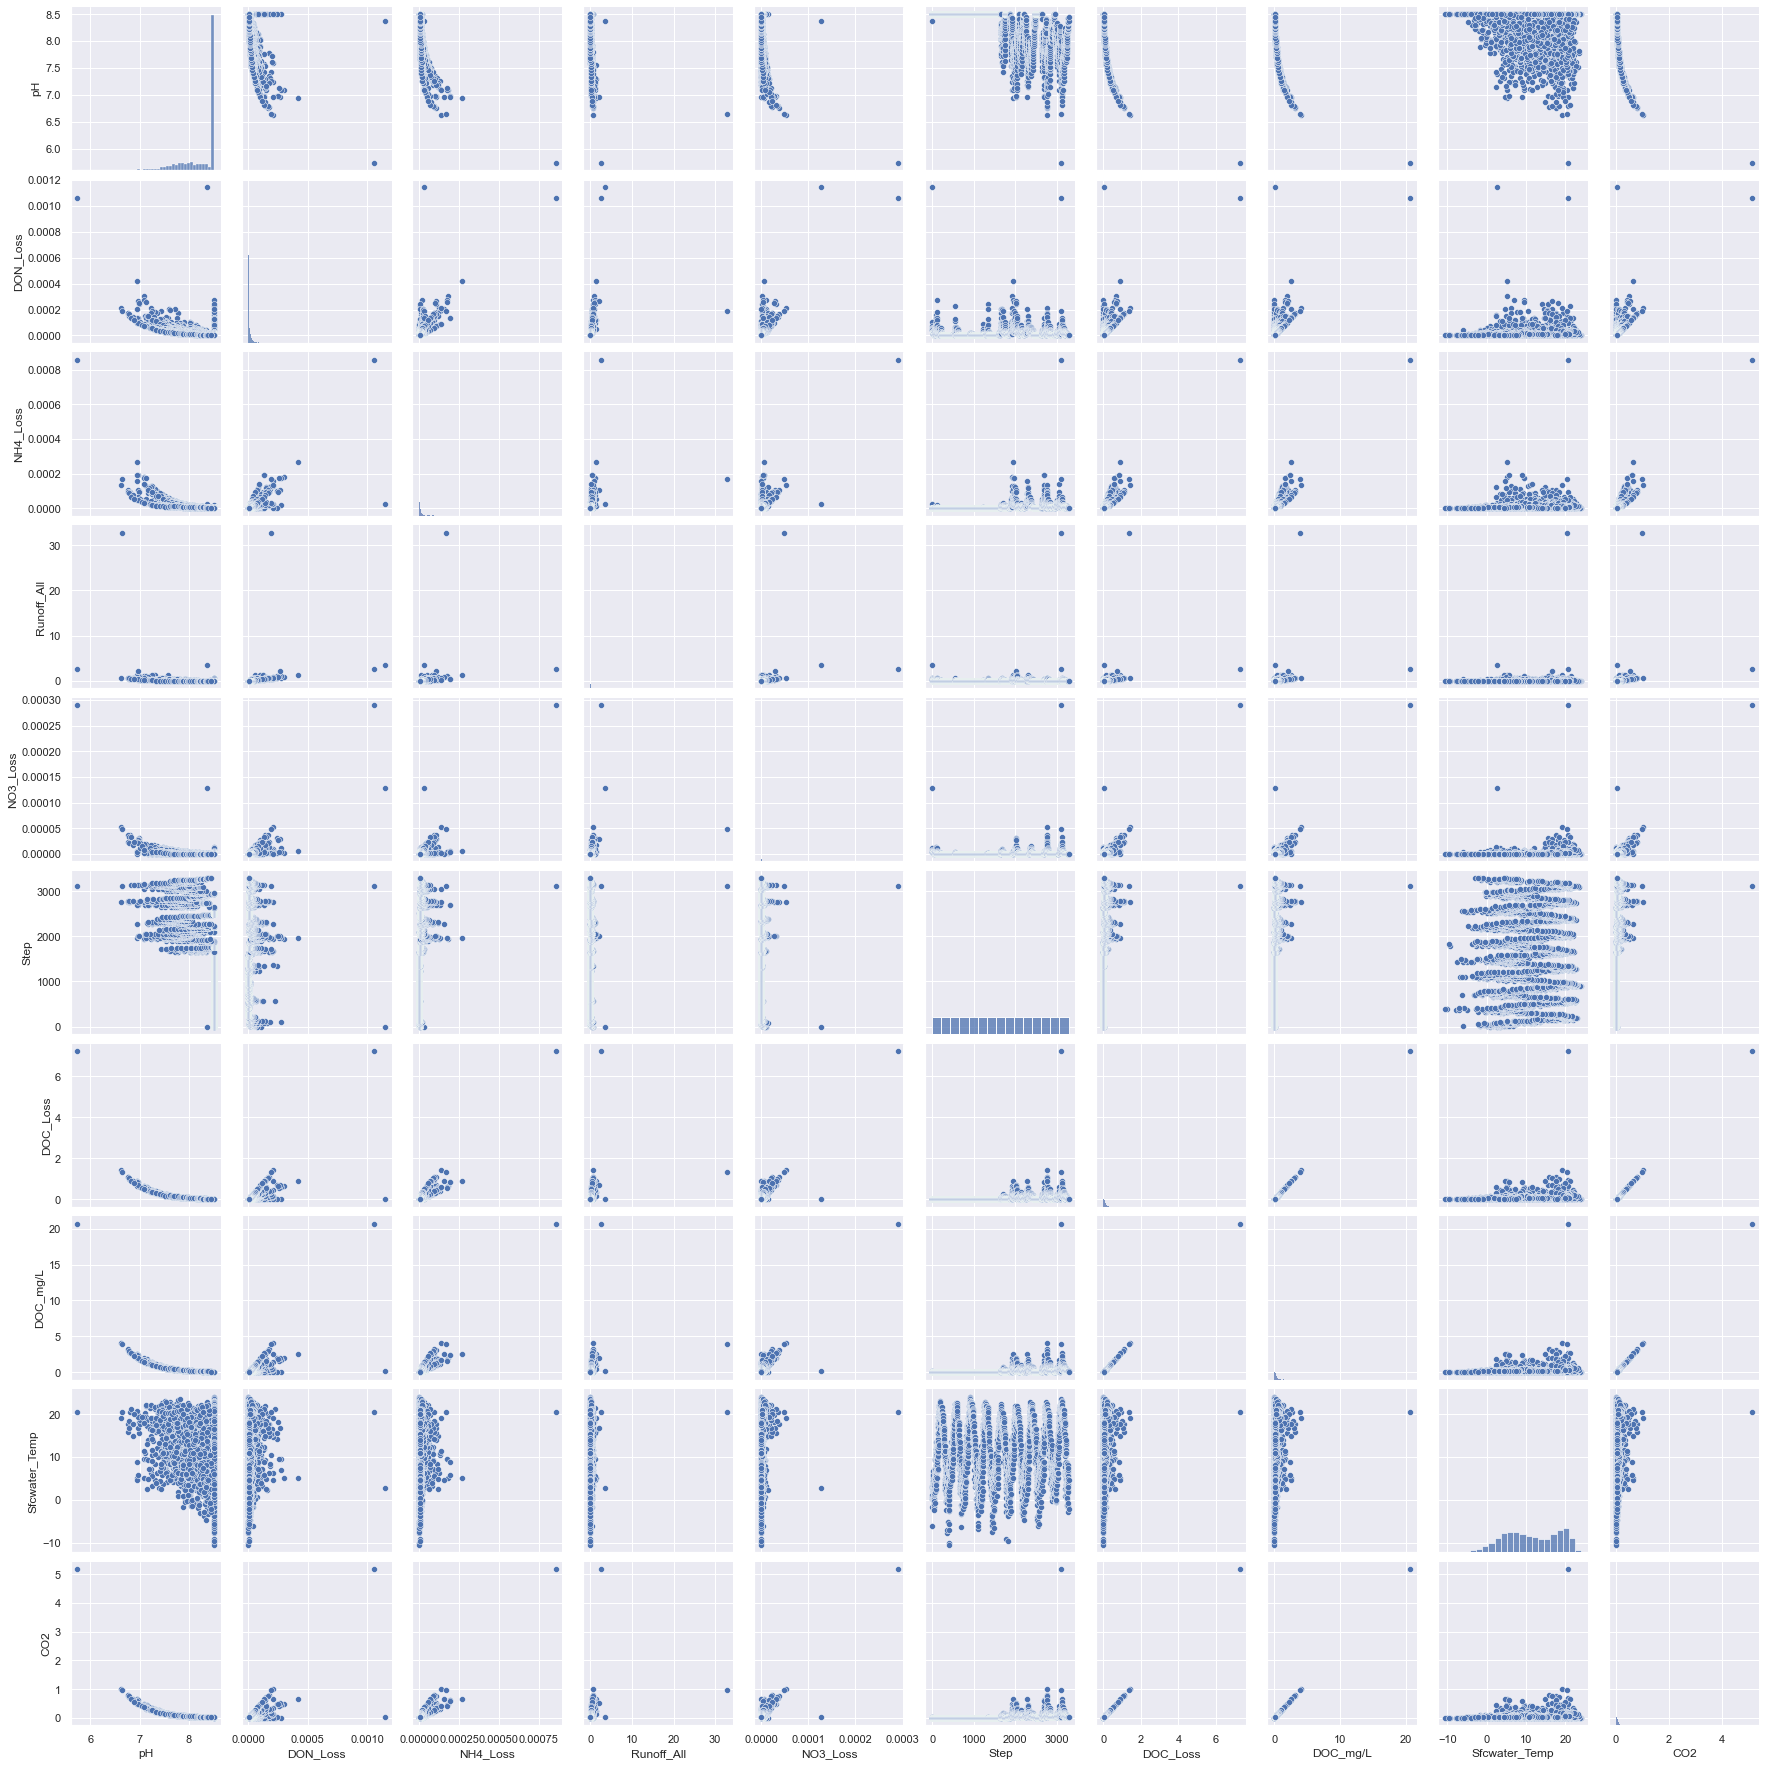

In [145]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

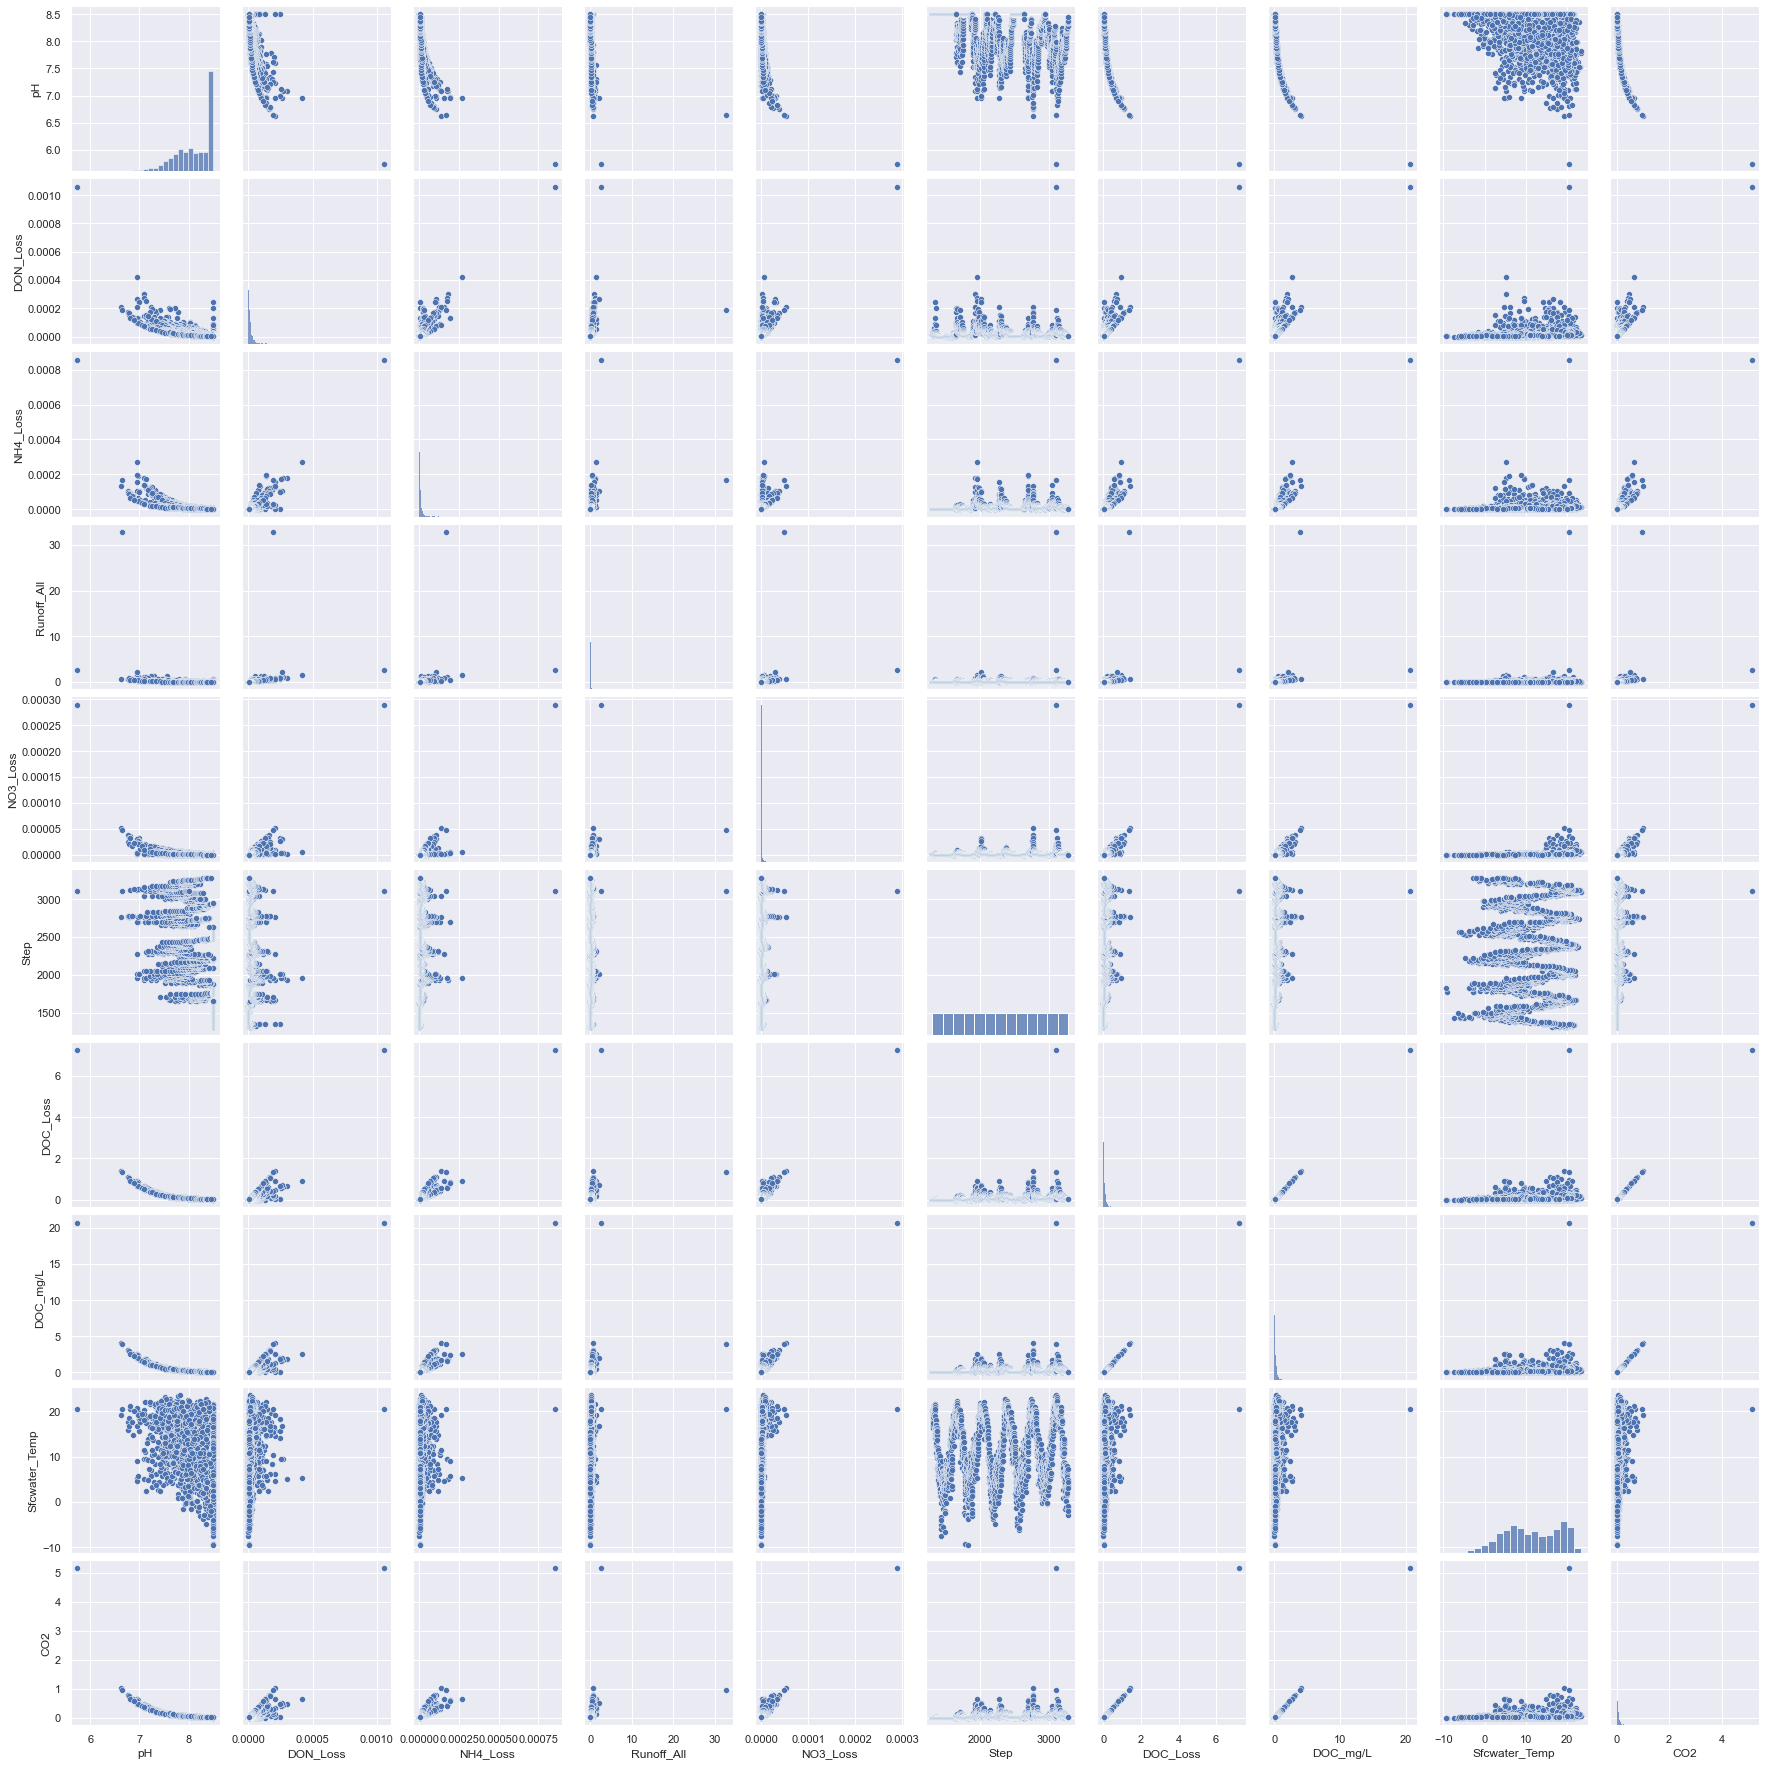

In [146]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

In [147]:
import numpy as np

In [148]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [149]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean      8.263093                            1.691709e-05   
std       0.361084                            3.963505e-05   
min       5.738487                            1.531152e-07   
10%       7.701532                            4.551938e-07   
25%       8.052369                            1.233630e-06   
50%       8.500000                            6.516657e-06   
75%       8.500000                            1.809667e-05   
90%       8.500000                            4.021341e-05   
max       8.500000                            1.146204e-03   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             7.625075e-06   
std                              2.251210e-05   
min                              1.088774e-09   
10%                              1.042998e-08   
25%                              4.258997e-08   
50%                              1.503466e-06   
75%                              7.255509e-06   
90%                              1.976112e-05   
max                              8.575994e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.064497   
std                                 0.588327   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001197   
50%                                 0.011942   
75%                                 0.046786   
90%                                 0.141798   
max                                32.761253   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             1.036949e-06   
std                              6.225538e-06   
min                              1.490474e-11   
10%                              2.183074e-10   
25%                              1.307638e-09   
50%                              3.583955e-08   
75%                              4.484667e-07   
90%                              2.277790e-06   
max                              2.895190e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.053309     0.152313         11.248536   
std                                  0.164313     0.469465          6.931090   
min                                  0.000010     0.000029        -10.562500   
10%                                  0.000028     0.000081          2.262500   
25%                                  0.000083     0.000236          5.787500   
50%                                  0.006499     0.018567         11.112499   
75%                                  0.065367     0.186763         17.712502   
90%                                  0.138587     0.395961         20.412498   
max                                  7.239789    20.685111         24.087502   

               CO2  
count  3287.000000  
mean      0.038078  
std       0.117366  
min       0.000007  
10%       0.000020  
25%       0.000059  
50%       0.004642  
75%       0.046691  
90%       0.098990  
max       5.171278

In [150]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean      8.106381                            2.300984e-05   
std       0.393701                            4.056269e-05   
min       5.738487                            3.802427e-07   
10%       7.569240                            1.657499e-06   
25%       7.834375                            5.401864e-06   
50%       8.173802                            1.194507e-05   
75%       8.500000                            2.621481e-05   
90%       8.500000                            5.048013e-05   
max       8.500000                            1.057799e-03   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.247165e-05   
std                              2.796797e-05   
min                              1.220301e-08   
10%                              7.737041e-08   
25%                              2.002868e-06   
50%                              5.579610e-06   
75%                              1.350305e-05   
90%                              2.920129e-05   
max                              8.575994e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.093479   
std                                 0.751254   
min                                 0.000163   
10%                                 0.001745   
25%                                 0.009101   
50%                                 0.026392   
75%                                 0.078694   
90%                                 0.193820   
max                                32.761253   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.499166e-06   
std                              7.415514e-06   
min                              2.709295e-10   
10%                              3.174392e-09   
25%                              2.143444e-08   
50%                              1.229927e-07   
75%                              1.184131e-06   
90%                              3.655807e-06   
max                              2.895190e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.088372     0.252491         11.347358   
std                                  0.204414     0.584041          6.693310   
min                                  0.000030     0.000086         -9.512501   
10%                                  0.000134     0.000383          2.765000   
25%                                  0.015323     0.043781          6.162500   
50%                                  0.049825     0.142358         11.300000   
75%                                  0.103666     0.296190         17.562500   
90%                                  0.184827     0.528078         20.037498   
max                                  7.239789    20.685111         23.487500   

               CO2  
count  1978.000000  
mean      0.063123  
std       0.146010  
min       0.000022  
10%       0.000096  
25%       0.010945  
50%       0.035589  
75%       0.074047  
90%       0.132019  
max       5.171278

In [151]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            6.807274e-06   
std      0.0                            2.166121e-05   
min      8.5                            3.802427e-07   
10%      8.5                            4.348141e-07   
25%      8.5                            5.143244e-07   
50%      8.5                            1.098016e-06   
75%      8.5                            4.445583e-06   
90%      8.5                            1.506604e-05   
max      8.5                            2.428772e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.218804e-07   
std                              2.810034e-07   
min                              1.220301e-08   
10%                              1.596412e-08   
25%                              2.642449e-08   
50%                              5.345252e-08   
75%                              1.043285e-07   
90%                              2.332186e-07   
max                              3.163857e-06   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.013547   
std                                 0.055060   
min                                 0.000163   
10%                                 0.000211   
25%                                 0.000280   
50%                                 0.000949   
75%                                 0.005879   
90%                                 0.027048   
max                                 0.669267   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             5.835802e-08   
std                              2.086766e-07   
min                              2.709295e-10   
10%                              3.206178e-10   
25%                              3.847091e-10   
50%                              8.650887e-10   
75%                              2.948719e-08   
90%                              1.374874e-07   
max                              2.280290e-06   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000535    0.001529          9.384385   
std                                  0.001703    0.004865          6.408665   
min                                  0.000030    0.000086         -7.412499   
10%                                  0.000034    0.000099          2.187500   
25%                                  0.000041    0.000117          5.037500   
50%                                  0.000087    0.000248          8.112500   
75%                                  0.000358    0.001023         14.787500   
90%                                  0.001182    0.003378         18.687500   
max                                  0.019143    0.054694         21.612500   

              CO2  
count  313.000000  
mean     0.000382  
std      0.001216  
min      0.000022  
10%      0.000025  
25%      0.000029  
50%      0.000062  
75%      0.000256  
90%      0.000845  
max      0.013674

In [152]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.032385                                0.000026   
std       0.386696                                0.000043   
min       5.738487                                0.000002   
10%       7.524411                                0.000004   
25%       7.776574                                0.000007   
50%       8.055414                                0.000014   
75%       8.364287                                0.000030   
90%       8.500000                                0.000056   
max       8.500000                                0.001058   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.479326e-05   
std                              2.992064e-05   
min                              2.972375e-07   
10%                              1.944137e-06   
25%                              3.734202e-06   
50%                              7.034237e-06   
75%                              1.607040e-05   
90%                              3.225745e-05   
max                              8.575994e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.108505   
std                                 0.817647   
min                                 0.001940   
10%                                 0.006240   
25%                                 0.013945   
50%                                 0.034016   
75%                                 0.094504   
90%                                 0.217629   
max                                32.761253   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.770020e-06   
std                              8.053660e-06   
min                              3.229920e-09   
10%                              1.479642e-08   
25%                              3.538048e-08   
50%                              2.047684e-07   
75%                              1.606881e-06   
90%                              4.372958e-06   
max                              2.895190e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.104884     0.299669         11.716374   
std                                  0.218907     0.625449          6.683227   
min                                  0.001146     0.003273         -9.512501   
10%                                  0.014742     0.042120          3.012500   
25%                                  0.032658     0.093309          6.462500   
50%                                  0.064335     0.183814         11.712500   
75%                                  0.118272     0.337920         18.012500   
90%                                  0.203281     0.580803         20.187500   
max                                  7.239789    20.685111         23.487500   

               CO2  
count  1665.000000  
mean      0.074917  
std       0.156362  
min       0.000818  
10%       0.010530  
25%       0.023327  
50%       0.045954  
75%       0.084480  
90%       0.145201  
max       5.171278

In [153]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'})

In [154]:
df_di_a.describe()

pH_1T   Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.106381  2297.500000                            2.300984e-05   
std       0.393701   571.143736                            4.056269e-05   
min       5.738487  1309.000000                            3.802427e-07   
25%       7.834375  1803.250000                            5.401864e-06   
50%       8.173802  2297.500000                            1.194507e-05   
75%       8.500000  2791.750000                            2.621481e-05   
max       8.500000  3286.000000                            1.057799e-03   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.247165e-05   
std                              2.796797e-05   
min                              1.220301e-08   
25%                              2.002868e-06   
50%                              5.579610e-06   
75%                              1.350305e-05   
max                              8.575994e-04   

       Runoff_All(mm/day)_Delineated_Average         Year  \
count                            1978.000000  1978.000000   
mean                                0.093479  2003.769464   
std                                 0.751254     1.576393   
min                                 0.000163  2001.000000   
25%                                 0.009101  2002.000000   
50%                                 0.026392  2004.000000   
75%                                 0.078694  2005.000000   
max                                32.761253  2006.000000   

       NO3_Loss(gN/day/m2)_Delineated_Average         Step  \
count                            1.978000e+03  1978.000000   
mean                             1.499166e-06  2297.500000   
std                              7.415514e-06   571.143736   
min                              2.709295e-10  1309.000000   
25%                              2.143444e-08  1803.250000   
50%                              1.229927e-07  2297.500000   
75%                              1.184131e-06  2791.750000   
max                              2.895190e-04  3286.000000   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.088372     0.252491         11.347358   
std                                  0.204414     0.584041          6.693310   
min                                  0.000030     0.000086         -9.512501   
25%                                  0.015323     0.043781          6.162500   
50%                                  0.049825     0.142358         11.300000   
75%                                  0.103666     0.296190         17.562500   
max                                  7.239789    20.685111         23.487500   

               CO2  Alk_140  
count  1978.000000   1978.0  
mean      0.063123    140.0  
std       0.146010      0.0  
min       0.000022    140.0  
25%       0.010945    140.0  
50%       0.035589    140.0  
75%       0.074047    140.0  
max       5.171278    140.0

In [155]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [156]:
df_di_a_lr

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
slope     -3.009003e-04                           -8.604083e-10   
intercept  8.797699e+00                            2.498662e-05   
rvalue    -4.365172e-01                           -1.211500e-02   
p-value    8.058186e-93                            5.902387e-01   
stderr     1.395158e-05                            1.597556e-09   

           NH4_Loss(gN/day/m2)_Delineated_Average  \
slope                                7.155189e-09   
intercept                           -3.967398e-06   
rvalue                               1.461186e-01   
p-value                              6.596759e-11   
stderr                               1.089772e-09   

           Runoff_All(mm/day)_Delineated_Average         Year  \
slope                                   0.000039     0.002713   
intercept                               0.003693  1997.536209   
rvalue                                  0.029711     0.982970   
p-value                                 0.186559     0.000000   
stderr                                  0.000030     0.000011   

           NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
slope                                1.394665e-09   1.0   
intercept                           -1.705077e-06   0.0   
rvalue                               1.074172e-01   1.0   
p-value                              1.682918e-06   0.0   
stderr                               2.903904e-10   0.0   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                                7.557684e-05  2.159338e-04   
intercept                           -8.526582e-02 -2.436166e-01   
rvalue                               2.111655e-01  2.111655e-01   
p-value                              2.248492e-21  2.248492e-21   
stderr                               7.869858e-06  2.248531e-05   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758  5.398346e-05      0.0  
intercept          9.606002 -6.090416e-02    140.0  
rvalue             0.064675  2.111655e-01      0.0  
p-value            0.004007  2.248492e-21      1.0  
stderr             0.000263  5.621327e-06      0.0

In [157]:
df_pools_dif.head()

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            4.914795                          178.441696   
1                            4.915759                          178.600606   
2                            4.916773                          178.762523   
3                            4.917767                          178.922577   
4                            4.918738                          179.075808   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.653129                            0.017829   
1                            0.656923                            0.018524   
2                            0.652833                            0.018774   
3                            0.649692                            0.018661   
4                            0.648918                            0.018418   

   Step  Runoff_All(mm/day)_Delineated_Average        Date  
0  1309                               0.014679  2001-08-02  
1  1310                               0.022896  2001-08-03  
2  1311                               0.028915  2001-08-04  
3  1312                               0.020605  2001-08-05  
4  1313                               0.015855  2001-08-06

In [158]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average'].values;
df_di_a['Date'] = pools_di['Date'].values;

<ipython-input-158-0e012b6f20e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values;
<ipython-input-158-0e012b6f20e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
<ipython-input-158-0e012b6f20e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [159]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-159-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [160]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.106381  2297.500000                            2.300984e-05   
std       0.393701   571.143736                            4.056269e-05   
min       5.738487  1309.000000                            3.802427e-07   
10%       7.569240  1506.700000                            1.657499e-06   
25%       7.834375  1803.250000                            5.401864e-06   
50%       8.173802  2297.500000                            1.194507e-05   
75%       8.500000  2791.750000                            2.621481e-05   
90%       8.500000  3088.300000                            5.048013e-05   
max       8.500000  3286.000000                            1.057799e-03   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.247165e-05   
std                              2.796797e-05   
min                              1.220301e-08   
10%                              7.737041e-08   
25%                              2.002868e-06   
50%                              5.579610e-06   
75%                              1.350305e-05   
90%                              2.920129e-05   
max                              8.575994e-04   

       Runoff_All(mm/day)_Delineated_Average         Year  \
count                            1978.000000  1978.000000   
mean                                0.093479  2003.769464   
std                                 0.751254     1.576393   
min                                 0.000163  2001.000000   
10%                                 0.001745  2002.000000   
25%                                 0.009101  2002.000000   
50%                                 0.026392  2004.000000   
75%                                 0.078694  2005.000000   
90%                                 0.193820  2006.000000   
max                                32.761253  2006.000000   

       NO3_Loss(gN/day/m2)_Delineated_Average         Step  \
count                            1.978000e+03  1978.000000   
mean                             1.499166e-06  2297.500000   
std                              7.415514e-06   571.143736   
min                              2.709295e-10  1309.000000   
10%                              3.174392e-09  1506.700000   
25%                              2.143444e-08  1803.250000   
50%                              1.229927e-07  2297.500000   
75%                              1.184131e-06  2791.750000   
90%                              3.655807e-06  3088.300000   
max                              2.895190e-04  3286.000000   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.088372     0.252491         11.347358   
std                                  0.204414     0.584041          6.693310   
min                                  0.000030     0.000086         -9.512501   
10%                                  0.000134     0.000383          2.765000   
25%                                  0.015323     0.043781          6.162500   
50%                                  0.049825     0.142358         11.300000   
75%                                  0.103666     0.296190         17.562500   
90%                                  0.184827     0.528078         20.037498   
max                                  7.239789    20.685111         23.487500   

               CO2  Alk_140      DOC_Pool     NH4_Pool     NO3_Pool  
count  1978.000000   1978.0   1978.000000  1978.000000  1978.000000  
mean      0.063123    140.0   7443.258572     5.653199     0.396029  
std       0.146010      0.0   5220.469239     3.350871     0.359784  
min       0.000022    140.0    178.441696     0.635454     0.001144  
10%       0.000096    140.0    190.056750     1.065425     0.

In [161]:
df_di_a.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
1309    8.5        1309                                0.000009   
1310    8.5        1310                                0.000012   
1311    8.5        1311                                0.000016   
1312    8.5        1312                                0.000012   
1313    8.5        1313                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.971300e-08   
1310                            1.433506e-07   
1311                            1.811217e-07   
1312                            1.315092e-07   
1313                            1.030502e-07   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014679  2001   
1310                               0.022896  2001   
1311                               0.028915  2001   
1312                               0.020605  2001   
1313                               0.015855  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                            9.611801e-08  1309   
1310                            1.380132e-07  1310   
1311                            1.859344e-07  1311   
1312                            1.394759e-07  1312   
1313                            1.088426e-07  1313   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000691  0.001973         20.112500   
1310                                0.000951  0.002716         19.737500   
1311                                0.001263  0.003608         19.962502   
1312                                0.000954  0.002727         19.812500   
1313                                0.000756  0.002161         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1309  0.000493      140   Prefire    Meets  178.441696  0.653129  0.017829   
1310  0.000679      140   Prefire    Meets  178.600606  0.656923  0.018524   
1311  0.000902      140   Prefire    Meets  178.762523  0.652833  0.018774   
1312  0.000682      140   Prefire    Meets  178.922577  0.649692  0.018661   
1313  0.000540      140   Prefire    Meets  179.075808  0.648918  0.018418   

            Date  
1309  2001-08-02  
1310  2001-08-03  
1311  2001-08-04  
1312  2001-08-05  
1313  2001-08-06

In [162]:
#Defining all as Meets so that the .loc of the criteria mask will set the criteria to exceeds
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [163]:
#Setting EPA Criteria Mask for those days where exceedance occured for NH4 or NO3 based on pH calculation
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [222]:
#Those that 'exceed' drink water standards
criteria_mask
#export criteria mask to csv
#criteria_mask.to_csv('11182110NOV21A_WQX_Exceedance.csv')

In [165]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [166]:
df_di_a['Criteria'].unique()

array(['Exceeds', 'Meets'], dtype=object)

In [223]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111821BC10NOV21a_exceed_allstats.csv')

In [224]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111821BC10NOV21a_exceed_pfstats.csv')

In [225]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('111821BC10NOV21a_exceed_pofstats.csv')

In [170]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
1309    8.5        1309                                0.000009   
1310    8.5        1310                                0.000012   
1311    8.5        1311                                0.000016   
1312    8.5        1312                                0.000012   
1313    8.5        1313                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.971300e-08   
1310                            1.433506e-07   
1311                            1.811217e-07   
1312                            1.315092e-07   
1313                            1.030502e-07   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1309                               0.014679  2001   
1310                               0.022896  2001   
1311                               0.028915  2001   
1312                               0.020605  2001   
1313                               0.015855  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1309                            9.611801e-08  1309   
1310                            1.380132e-07  1310   
1311                            1.859344e-07  1311   
1312                            1.394759e-07  1312   
1313                            1.088426e-07  1313   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1309                                0.000691  0.001973         20.112500   
1310                                0.000951  0.002716         19.737500   
1311                                0.001263  0.003608         19.962502   
1312                                0.000954  0.002727         19.812500   
1313                                0.000756  0.002161         19.287498   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1309  0.000493      140   Prefire  Exceeds  178.441696  0.653129  0.017829   
1310  0.000679      140   Prefire  Exceeds  178.600606  0.656923  0.018524   
1311  0.000902      140   Prefire  Exceeds  178.762523  0.652833  0.018774   
1312  0.000682      140   Prefire  Exceeds  178.922577  0.649692  0.018661   
1313  0.000540      140   Prefire  Exceeds  179.075808  0.648918  0.018418   

            Date  
1309  2001-08-02  
1310  2001-08-03  
1311  2001-08-04  
1312  2001-08-05  
1313  2001-08-06

In [186]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [226]:
#Brush Creek Pre-fire linear #.to_csv('111821BC10NOV21a_pflr.csv')regression
bc_pf_lr
#bc_pf_lr.to_csv('111821BC10NOV21a_pflr.csv')

In [194]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire'] 
bc_pof.head()
#bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
1622    8.5        1622                                0.000012   
1623    8.5        1623                                0.000013   
1624    8.5        1624                                0.000014   
1625    8.5        1625                                0.000013   
1626    8.5        1626                                0.000012   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1622                            2.972375e-07   
1623                            3.757804e-07   
1624                            4.622129e-07   
1625                            4.759715e-07   
1626                            4.954829e-07   

      Runoff_All(mm/day)_Delineated_Average  Year  \
1622                               0.020572  2002   
1623                               0.022964  2002   
1624                               0.024340  2002   
1625                               0.022225  2002   
1626                               0.020637  2002   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
1622                            8.458507e-08  1622   
1623                            7.686229e-08  1623   
1624                            7.718007e-08  1624   
1625                            6.967701e-08  1625   
1626                            6.573251e-08  1626   

      DOC_Loss(gC/day/m2)_Delineated_Average  DOC_mg/L  Sfc_Water_Temp_C  \
1622                                0.001146  0.003273         17.262500   
1623                                0.001365  0.003900         15.687500   
1624                                0.001690  0.004829         18.387500   
1625                                0.001711  0.004888         16.662500   
1626                                0.001737  0.004964         15.012501   

           CO2  Alk_140 Condition Criteria    DOC_Pool  NH4_Pool  NO3_Pool  \
1622  0.000818      140  Postfire  Exceeds  213.785139  0.850360  0.011439   
1623  0.000975      140  Postfire  Exceeds  228.843275  0.887351  0.009955   
1624  0.001207      140  Postfire  Exceeds  249.859750  0.920030  0.009372   
1625  0.001222      140  Postfire  Exceeds  266.931349  0.953161  0.009273   
1626  0.001241      140  Postfire  Exceeds  280.658569  0.984584  0.009275   

            Date  
1622  2002-06-11  
1623  2002-06-12  
1624  2002-06-13  
1625  2002-06-14  
1626  2002-06-15

In [196]:
bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0', 'Year', 'Step'})

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.032385                                0.000026   
std       0.386696                                0.000043   
min       5.738487                                0.000002   
10%       7.524411                                0.000004   
25%       7.776574                                0.000007   
50%       8.055414                                0.000014   
75%       8.364287                                0.000030   
90%       8.500000                                0.000056   
max       8.500000                                0.001058   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.479326e-05   
std                              2.992064e-05   
min                              2.972375e-07   
10%                              1.944137e-06   
25%                              3.734202e-06   
50%                              7.034237e-06   
75%                              1.607040e-05   
90%                              3.225745e-05   
max                              8.575994e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.108505   
std                                 0.817647   
min                                 0.001940   
10%                                 0.006240   
25%                                 0.013945   
50%                                 0.034016   
75%                                 0.094504   
90%                                 0.217629   
max                                32.761253   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             1.770020e-06   
std                              8.053660e-06   
min                              3.229920e-09   
10%                              1.479642e-08   
25%                              3.538048e-08   
50%                              2.047684e-07   
75%                              1.606881e-06   
90%                              4.372958e-06   
max                              2.895190e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.104884     0.299669         11.716374   
std                                  0.218907     0.625449          6.683227   
min                                  0.001146     0.003273         -9.512501   
10%                                  0.014742     0.042120          3.012500   
25%                                  0.032658     0.093309          6.462500   
50%                                  0.064335     0.183814         11.712500   
75%                                  0.118272     0.337920         18.012500   
90%                                  0.203281     0.580803         20.187500   
max                                  7.239789    20.685111         23.487500   

               CO2  Alk_140      DOC_Pool     NH4_Pool     NO3_Pool  
count  1665.000000   1665.0   1665.000000  1665.000000  1665.000000  
mean      0.074917    140.0   8806.998963     6.529646     0.469402  
std       0.156362      0.0   4540.891639     2.910576     0.346040  
min       0.000818    140.0    213.785139     0.850360     0.009273  
10%       0.010530    140.0   2796.012695     3.049545     0.111752  
25%       0.023327    140.0   4969.290248     4.531713     0.177050  
50%       0.045954    140.0   9376.222098     6.149273     0.381811  
75%       0.084480    140.0  13047.264230     8.220478     0.646619  
90%       0.145201    140.0  14969.210938    10.912594     1.002733  
max       5.171278    140.0  16525.442243    14.106857     1.448935

In [203]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [228]:
bc_pof_lr
#bc_pof_lr.to_csv('111821BC10NOV21a_poflr.csv')

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
slope     -1.877190e-04                           -1.403829e-08   
intercept  8.493048e+00                            6.050568e-05   
rvalue    -2.333953e-01                           -1.587257e-01   
p-value    4.916481e-22                            7.357800e-11   
stderr     1.917816e-05                            2.141311e-09   

           NH4_Loss(gN/day/m2)_Delineated_Average  \
slope                                2.060102e-09   
intercept                            9.737766e-06   
rvalue                               3.310335e-02   
p-value                              1.769781e-01   
stderr                               1.525221e-09   

           Runoff_All(mm/day)_Delineated_Average         Year  \
slope                                   0.000002     0.002702   
intercept                               0.103093  1997.562396   
rvalue                                  0.001297     0.976756   
p-value                                 0.957827     0.000000   
stderr                                  0.000042     0.000015   

           NO3_Loss(gN/day/m2)_Delineated_Average  Step  \
slope                                1.183702e-09   1.0   
intercept                           -1.134784e-06   0.0   
rvalue                               7.066478e-02   1.0   
p-value                              3.915679e-03   0.0   
stderr                               4.097379e-10   0.0   

           DOC_Loss(gC/day/m2)_Delineated_Average      DOC_mg/L  \
slope                                5.605890e-05  1.601683e-04   
intercept                           -3.268432e-02 -9.338378e-02   
rvalue                               1.231228e-01  1.231228e-01   
p-value                              4.670815e-07  4.670815e-07   
stderr                               1.108008e-05  3.165738e-05   

           Sfc_Water_Temp_C           CO2  Alk_140      DOC_Pool  \
slope             -0.000180  4.004207e-05      0.0      9.409671   
intercept         12.157374 -2.334595e-02    140.0 -14284.333157   
rvalue            -0.012928  1.231228e-01      0.0      0.996293   
p-value            0.598092  4.670815e-07      1.0      0.000000   
stderr             0.000341  7.914345e-06      0.0      0.019922   

                NH4_Pool  NO3_Pool  
slope       4.306507e-03  0.000633  
intercept  -4.038522e+00 -1.084677  
rvalue      7.113777e-01  0.879886  
p-value    5.375968e-257  0.000000  
stderr      1.043318e-04  0.000008

In [207]:
 #Oneway ANOVA between pre and post fire nitrates
stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=561.7353889159938, pvalue=1.6795656397233848e-109)

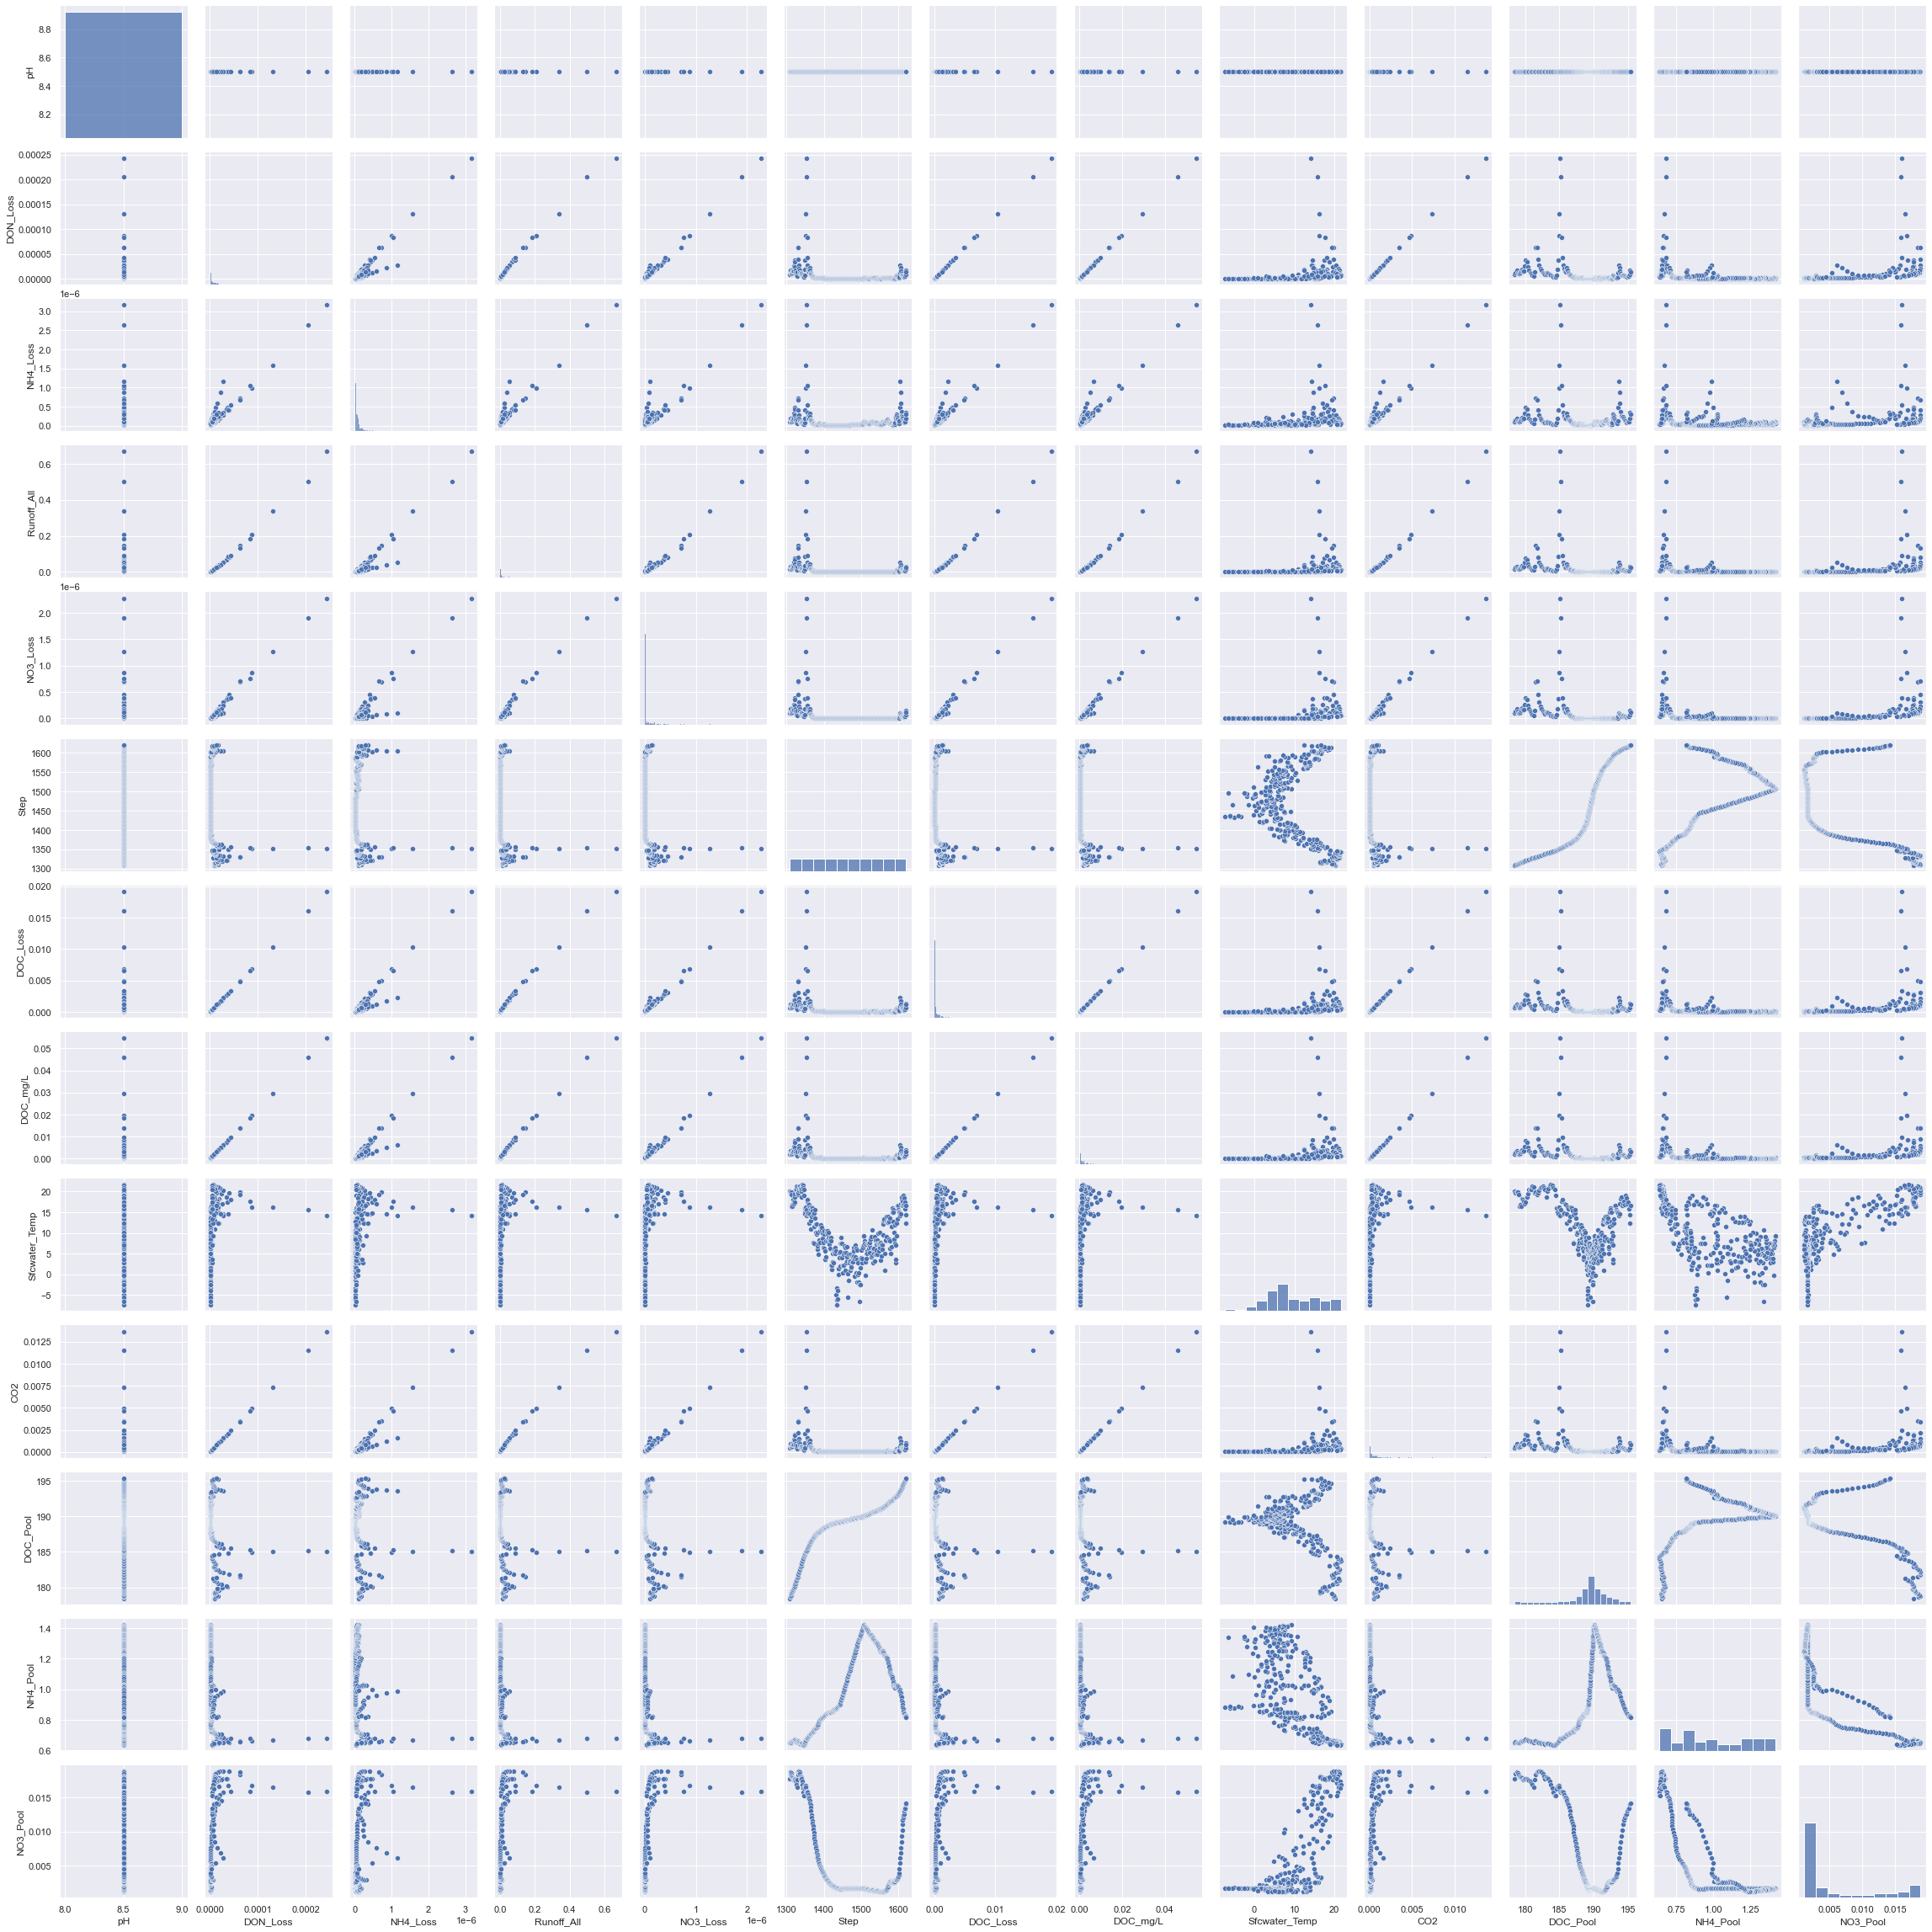

In [208]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

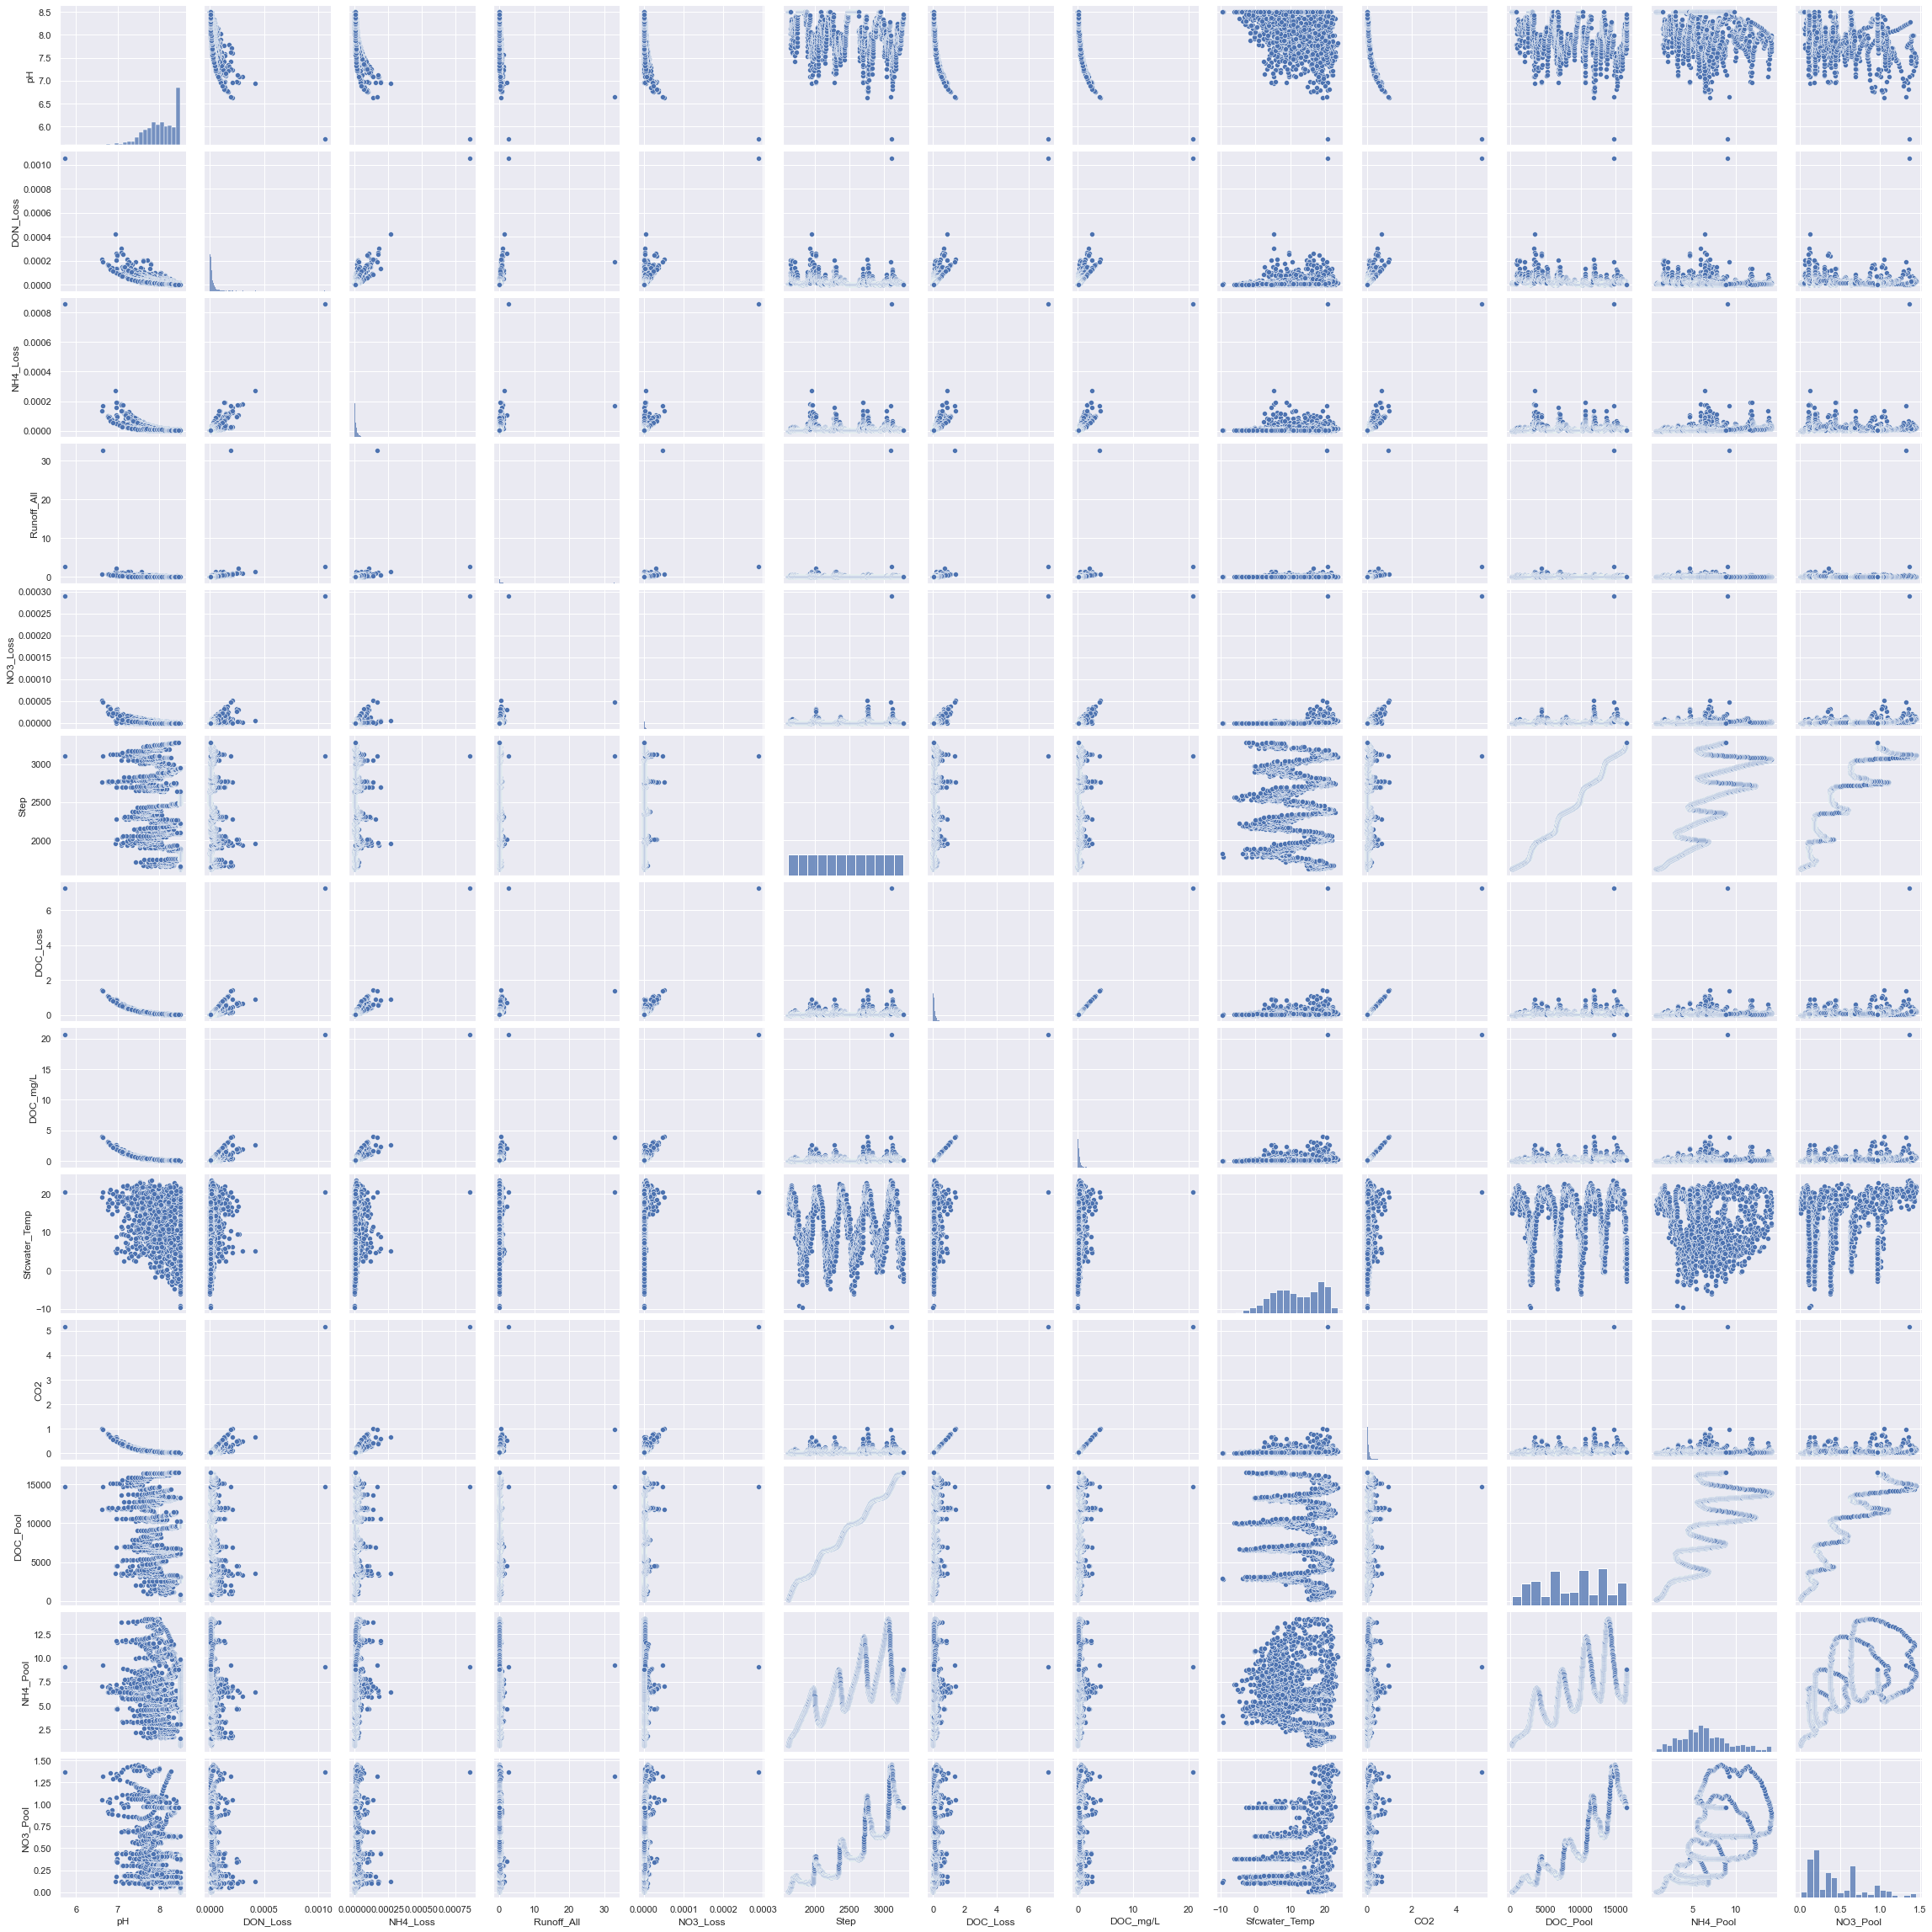

In [209]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

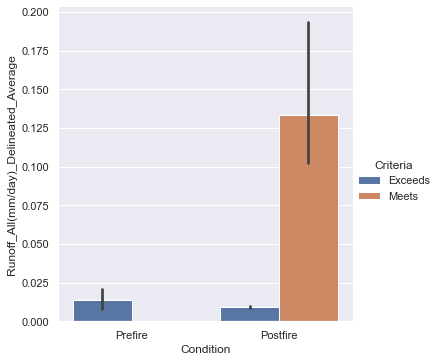

In [210]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

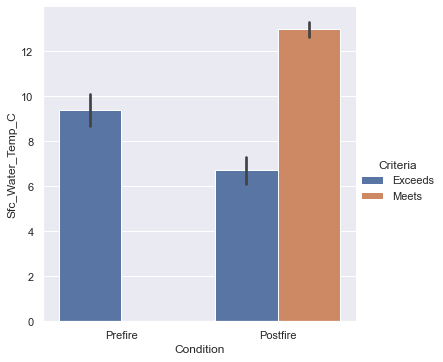

In [211]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

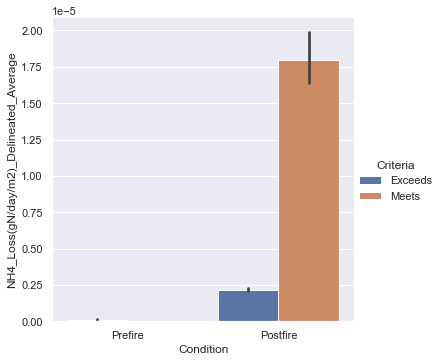

In [212]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

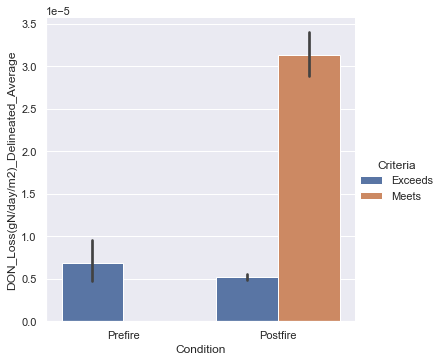

In [213]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

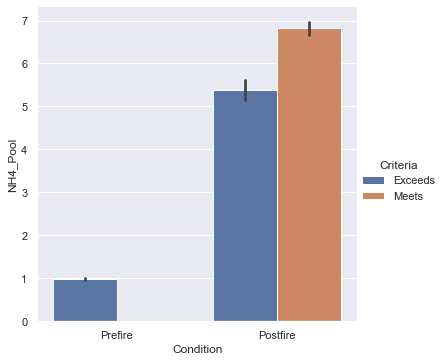

In [214]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

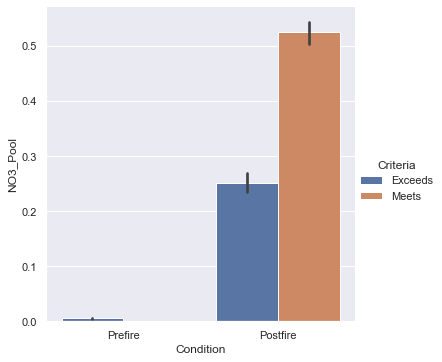

In [215]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

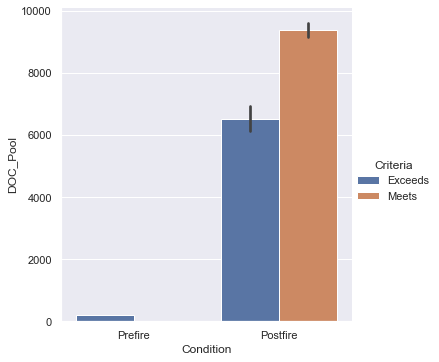

In [216]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

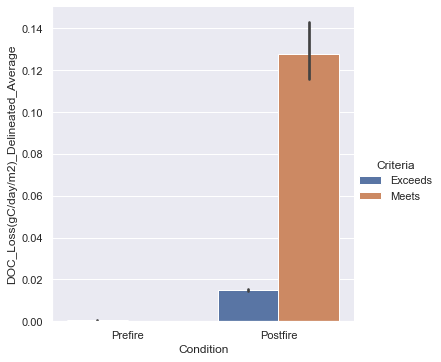

In [217]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [229]:
#df_di_a.to_csv('111821_BC10NOV21A_WQX_All_di.csv')

In [219]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [220]:
#data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


In [221]:
#data_df.head()